In [40]:
import numpy as np
import matplotlib.pylab as plt

# Activation function to determine the output based on input value
def activation_fn(x):
    if x >= 0:
        y = 1 # Positive Sample Set
    else:
        y = -1 # Negative Sample Set
    return y

# Function to calculate the number of misclassifications in the dataset using current weight vector
def misclassified(dataset, w_vector):
    misclassifications = 0
    #print ("===Testing===")
    for sample in dataset: # The first two in samples are the x,y coordinates. The last one in sample is the label.
        y = (w_vector[0]+(sample[0]*w_vector[1])+(sample[1]*w_vector[2]))
        y = activation_fn(y)
        if y != sample[2]:
            misclassifications += 1
    return misclassifications

# Function to plot the classification result with the current weight vector
# def plotting_classification_result10(Sp, Sn, w_vector, title):
def plotting_classification_result10(dataset, w_vector, title):
    # Initilize the scale for the plot
    scale=10 # Scale for the plot

    # Collect the coordinates for the postive and negative samples (for the easy of ploting)
    Sp_x = [] # List to store x-coordinates of positive samples
    Sp_y = [] # List to store y-coordinates of positive samples
    Sn_x = [] # List to store x-coordinates of negative samples
    Sn_y = [] # List to store y-coordinates of negative samples

    # Iterate through positive samples and append x, y coordinates to respective lists
    for i in dataset:
        if i[2] == 1:
            Sp_x.append(i[0])
            Sp_y.append(i[1])
        else :
            Sn_x.append(i[0])
            Sn_y.append(i[1])
    # for i in Sp:
    #     Sp_x.append(i[0])
    #     Sp_y.append(i[1])
    #
    # # Iterate through negative samples and append x, y coordinates to respective lists
    # for i in Sn:
    #     Sn_x.append(i[0])
    #     Sn_y.append(i[1])

    w0=w_vector[0]
    w1=w_vector[1]
    w2=w_vector[2]
    if w1 != 0:
      x1 = -(w0-w2*scale/2)/w1
      x2 = -(w0+w2*scale/2)/w1
      X = np.array([x1, x2])
      Y = np.array([-scale/2, scale/2])
    elif w2 != 0:
      y1 = -(w0-w1*scale/2)/w2
      y2 = -(w0+w1*scale/2)/w2
      X = np.array([-scale/2, scale/2])
      Y = np.array([y1, y2])

    fig, ax = plt.subplots(figsize=(10,10))
    blue = plt.scatter(Sn_x, Sn_y, c ='b', label='Sn : {} elements'.format(len(Sn_x)))
    red = plt.scatter(Sp_x, Sp_y, c='r', marker = "^", label='Sp : {} elements'.format(len(Sp_x)))
    line = ax.plot(X, Y, c = 'green', label='Perceptron Decision Boundary')
    plt.title(title)
    plt.legend(loc="upper right")
    plt.ylim([-scale/2,scale/2])
    plt.xlim([-scale/2,scale/2])
    plt.show()

# Function to plot the graph on the number of misclassifications vs. the epochs
def plotting_misclassification_over_epochs(w_history, missed):
    n_epochs = range(len(w_history)+1) # Create a range of epochs for x-axis of plot
    fig, ax = plt.subplots(figsize=(10,10)) # Create a plot figure
    ax.plot(n_epochs, missed+[0], c = 'green') # Plot number of misclassifications vs. epochs
    plt.ylabel('Number of Misclassifications') # Set y-axis label
    plt.xlabel('Number of Epochs') # Set x-axis label
    plt.ylim(bottom=0) # Set lower limit of y-axis to 0
    plt.xlim(left=0) # Set lower limit of x-axis to 0
    plt.show() # Display the plot


In [41]:
#@title This code implements the training of the perceptron learning algorithm (PLA).
def perceptron_training(dataset, w_vec):
    def get_sign(num):
        return 1 if num >= 0 else -1

    def misclassified(d, w):
        misclassifications = 0
        #print ("===Testing===")
        for sample in d: # The first two in samples are the x,y coordinates. The last one in sample is the label.
            y = (w[0]+(sample[0]*w[1])+(sample[1]*w[2]))
            y = activation_fn(y)
            if y != sample[2]:
                misclassifications += 1
        return misclassifications

    epoch = 0
    w_vectors = [w_vec] # List to store weight vectors at each epoch
    # print("w_vects : ", w_vectors)
    missed = [] # List to store number of misclassifications at each epoch
    plotting_classification_result10(dataset, w_vectors[0], 'Initial W') # Plot the classificaiton result with initial weight vector
    # To-Do
    # Need a while loop to continue training until no misclassifications

    # end_loop_flag = False
    w=w_vec
    miss_class_cnt = misclassified(dataset, w)
    missed.append(miss_class_cnt)

    while miss_class_cnt != 0 : #or end_loop_flag:

        # Using a for looop to iterate through each sample in the dataset
        for x1,x2,y in dataset:
            # Compute perceptron output
            cal_y = get_sign(w[0] + (w[1] * x1) + (w[2] * x2))
            # If misclassified, update weights
            if cal_y != y:
                w = [ w[0] + y ,  w[1] + ( y * x1 )  , w[2] + ( y * x2 ) ] # w[0] + y as x0 is always 1
                print ('Updated weights: ', w)

        # Calculate misclassification count after weight updates
        miss_class_cnt = misclassified(dataset, w)
        print ('Number of Misclassifications: ', miss_class_cnt)

        # Append current misclassification count to missed
        missed.append(miss_class_cnt)

        print("missed arry : ", missed)

        # plotting_classification_result10(Sp, Sn, w_vector, 'Epoch # '+str(epoch))

        # Append current weight vector to w_vectors list
        w_vectors.append(w)

        # Increment epoch counter
        epoch+=1

    print ('Final weights: ', w_vectors[-1])
    print ('Final res \n W_vects: ', w_vectors, "miss:" , missed)
    return w_vectors, missed

0 itr for taking AVG
Number of Misclassifications:  8


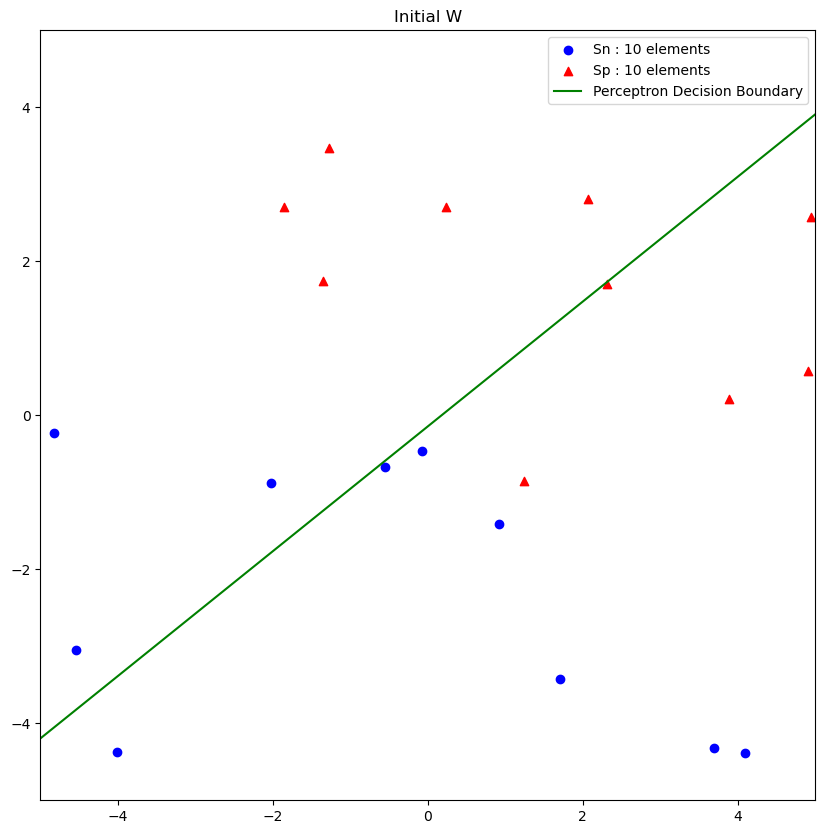

Updated weights:  [-0.9688869897634317, 4.366142871311071, 3.2593692573482445]
Updated weights:  [-1.9688869897634316, 0.6660174044712175, 7.581840276881572]
Updated weights:  [-0.9688869897634316, 1.9054591924464095, 6.732244480078877]
Number of Misclassifications:  1
missed arry :  [8, 1]
Updated weights:  [0.031113010236568428, 3.1449009804216015, 5.882648683276182]
Number of Misclassifications:  1
missed arry :  [8, 1, 1]
Updated weights:  [1.0311130102365684, 4.3843427683967935, 5.033052886473487]
Number of Misclassifications:  0
missed arry :  [8, 1, 1, 0]
Final weights:  [1.0311130102365684, 4.3843427683967935, 5.033052886473487]
Final res 
 W_vects:  [[0.031113010236568317, -0.17370086345901425, 0.21426707097287534], [-0.9688869897634316, 1.9054591924464095, 6.732244480078877], [0.031113010236568428, 3.1449009804216015, 5.882648683276182], [1.0311130102365684, 4.3843427683967935, 5.033052886473487]] miss: [8, 1, 1, 0]


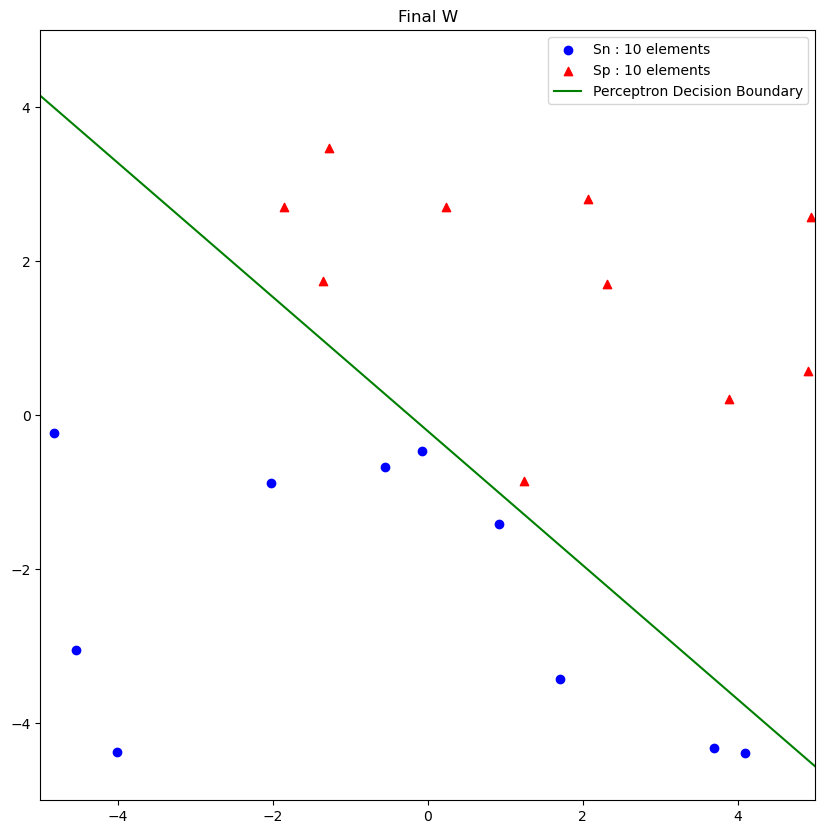

Number of Misclassifications:  10


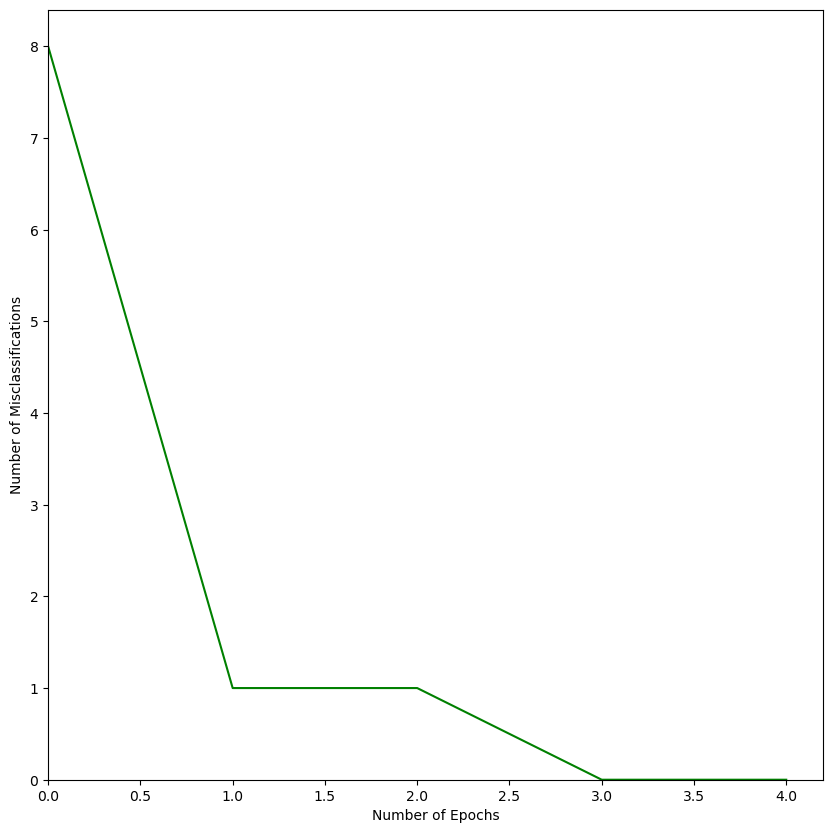

1 itr for taking AVG
Number of Misclassifications:  15


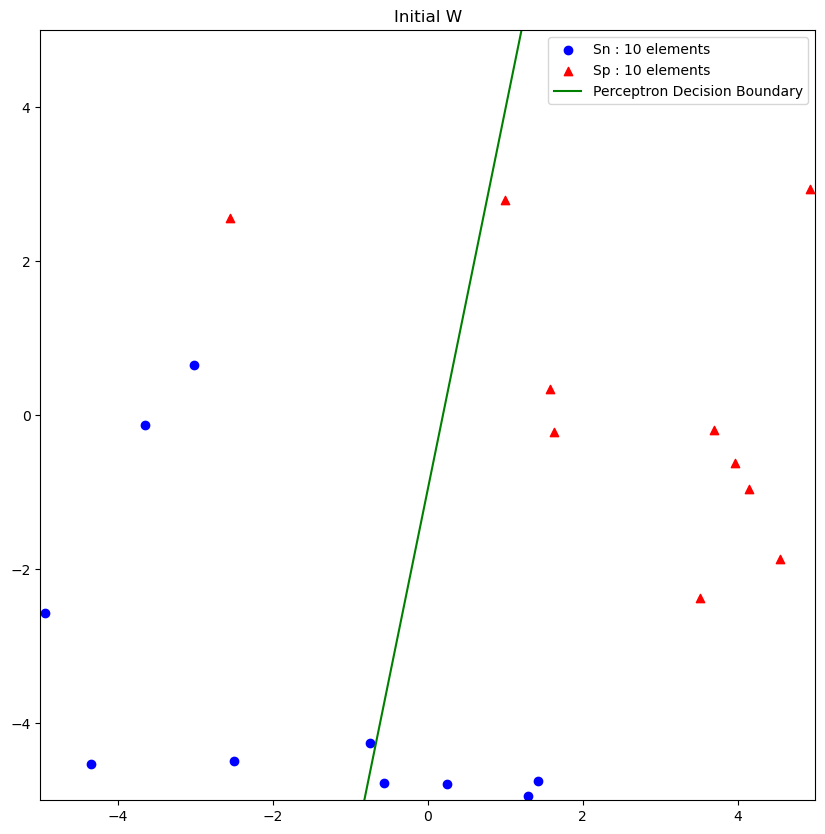

Updated weights:  [-0.8753290474254332, 3.7068771647554004, 4.66256616298219]
Number of Misclassifications:  0
missed arry :  [15, 0]
Final weights:  [-0.8753290474254332, 3.7068771647554004, 4.66256616298219]
Final res 
 W_vects:  [[0.12467095257456684, -0.6369463490502079, 0.1291886831189386], [-0.8753290474254332, 3.7068771647554004, 4.66256616298219]] miss: [15, 0]


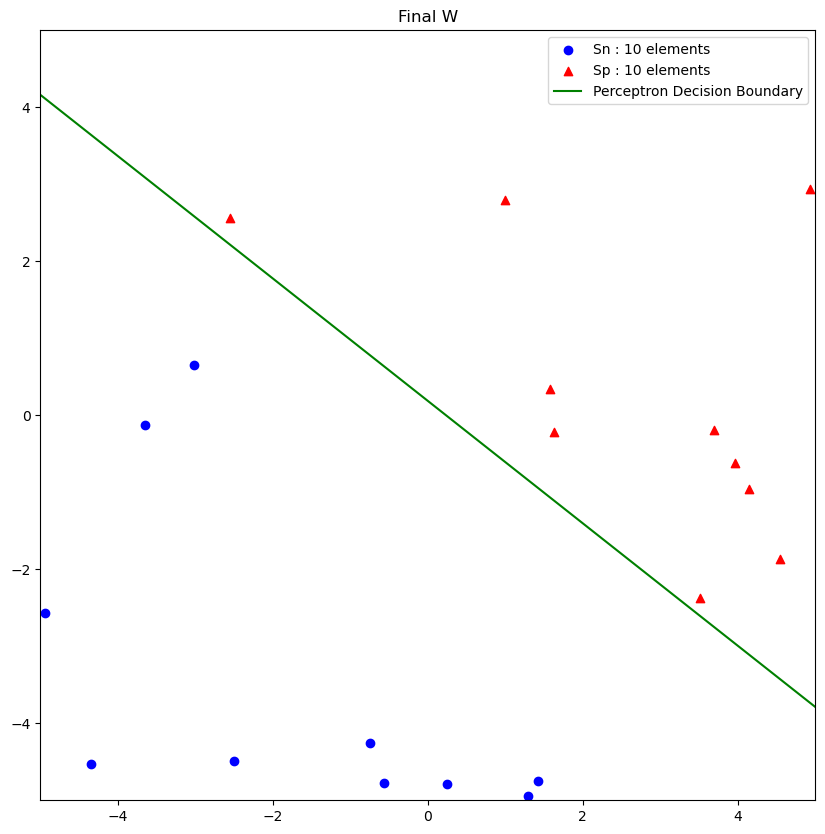

Number of Misclassifications:  13


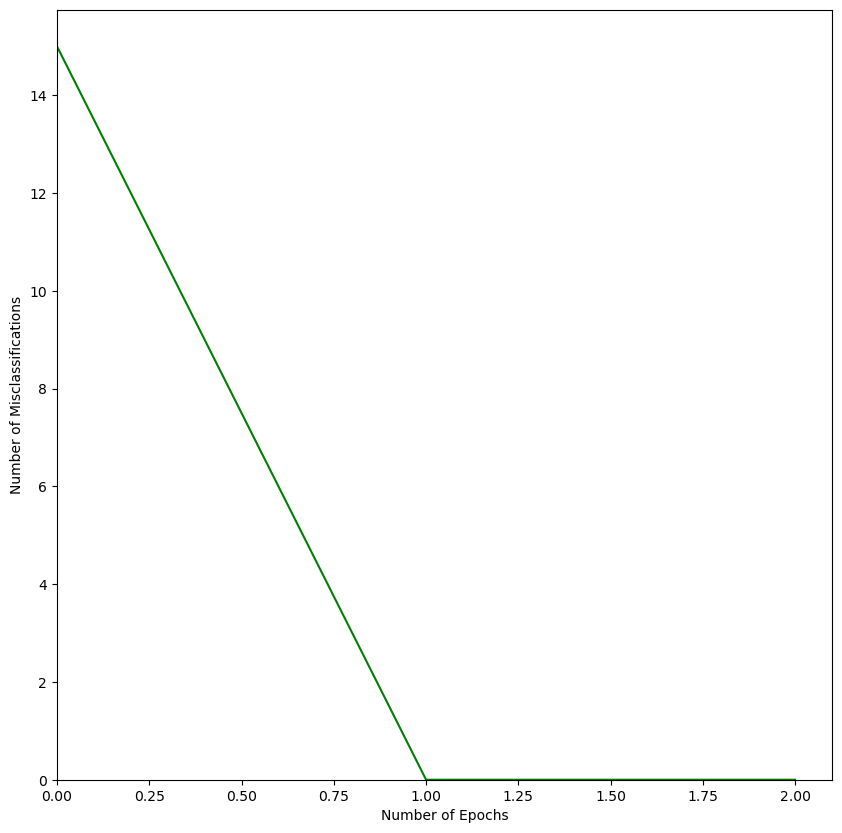

2 itr for taking AVG
Number of Misclassifications:  8


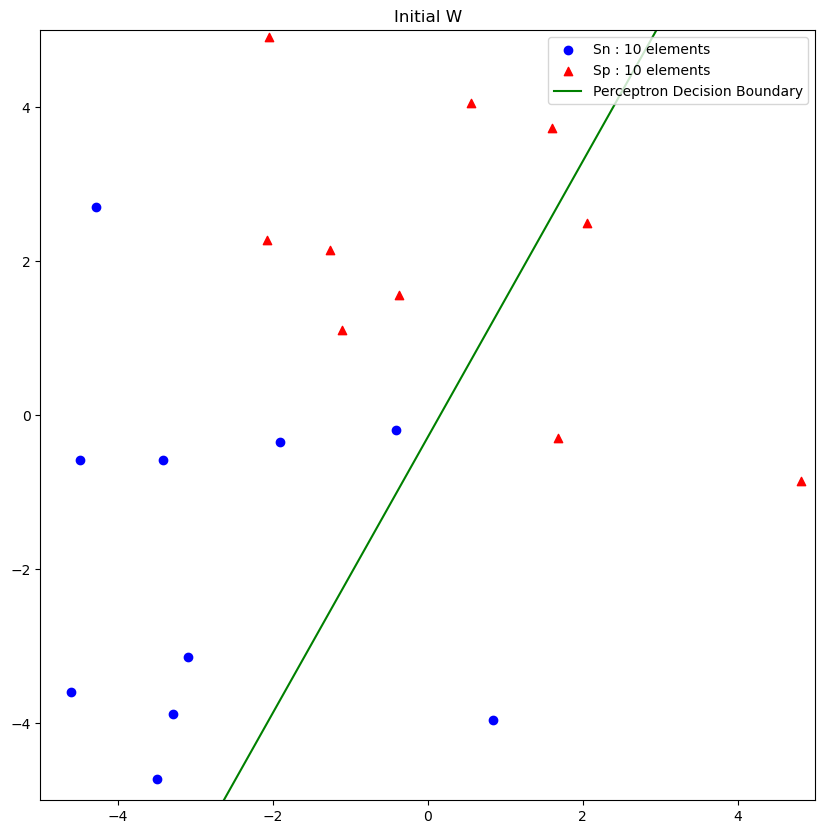

Updated weights:  [-1.152736664021975, 0.11311717866305071, 3.4198447126422233]
Updated weights:  [-0.15273666402197494, 4.9246463935653795, 2.565716046231302]
Updated weights:  [0.8472633359780251, 3.6637789202848614, 4.70945557827859]
Number of Misclassifications:  0
missed arry :  [8, 0]
Final weights:  [0.8472633359780251, 3.6637789202848614, 4.70945557827859]
Final res 
 W_vects:  [[-0.15273666402197494, 0.9598857576579853, -0.5357818015664679], [0.8472633359780251, 3.6637789202848614, 4.70945557827859]] miss: [8, 0]


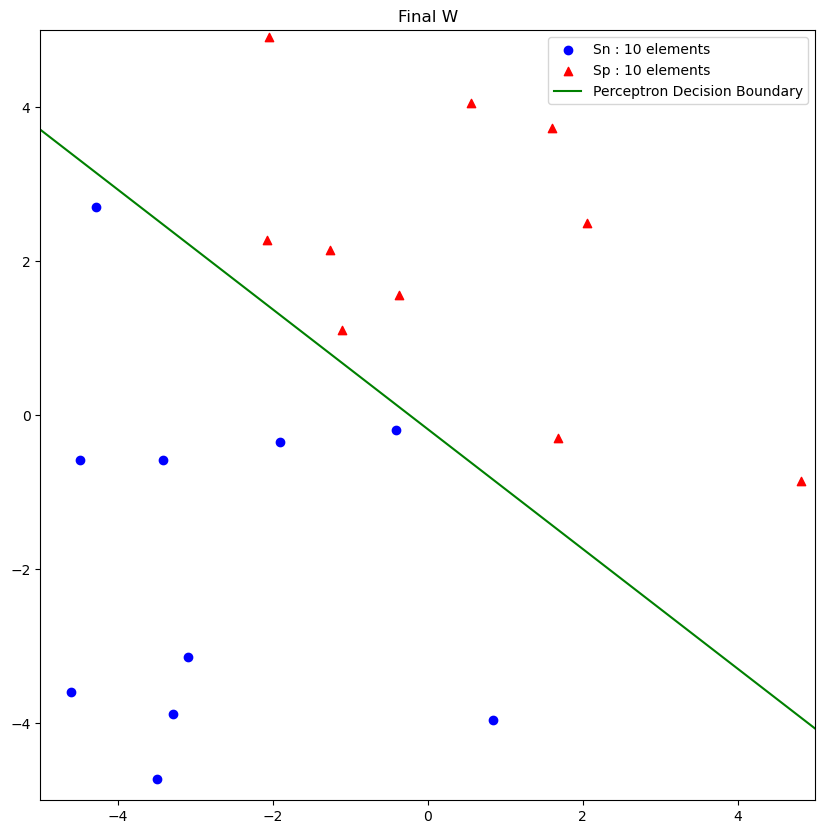

Number of Misclassifications:  9


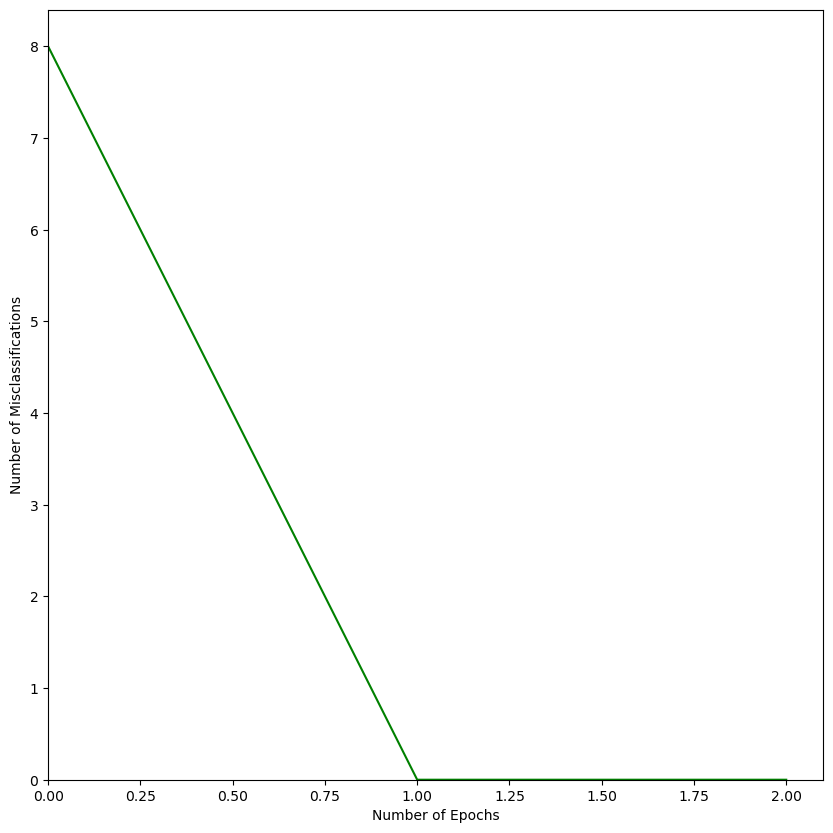

3 itr for taking AVG
Number of Misclassifications:  4


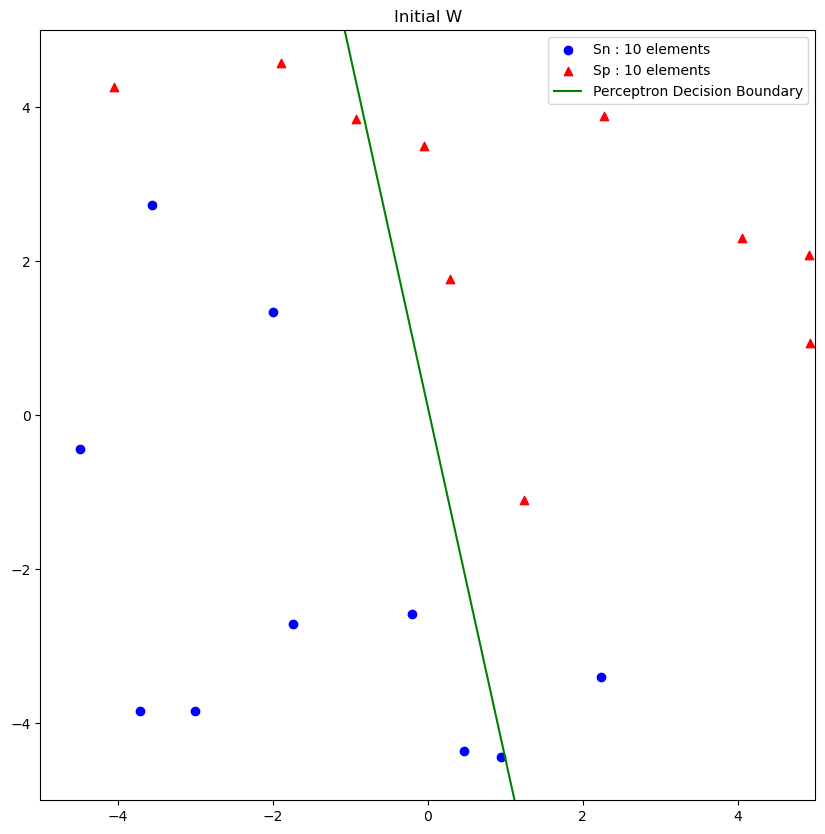

Updated weights:  [-1.0218835297861988, -1.3491942852951695, 3.599524881327097]
Updated weights:  [-2.021883529786199, 2.204736935339158, 0.8688419125514879]
Updated weights:  [-1.0218835297861988, -1.845343800962516, 5.135972810458297]
Updated weights:  [-0.021883529786198785, 3.0918174934451037, 6.071827348314405]
Updated weights:  [0.9781164702138012, 4.333512891637273, 4.977248890486039]
Number of Misclassifications:  0
missed arry :  [4, 0]
Final weights:  [0.9781164702138012, 4.333512891637273, 4.977248890486039]
Final res 
 W_vects:  [[-0.02188352978619873, 0.8923639435158268, 0.19560240885499303], [0.9781164702138012, 4.333512891637273, 4.977248890486039]] miss: [4, 0]


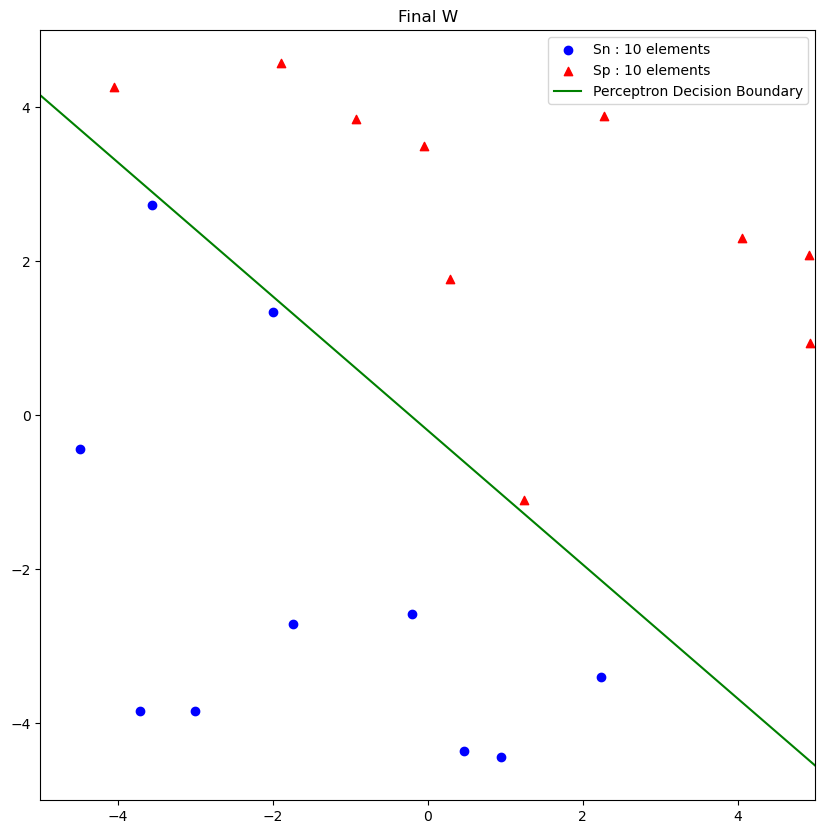

Number of Misclassifications:  4


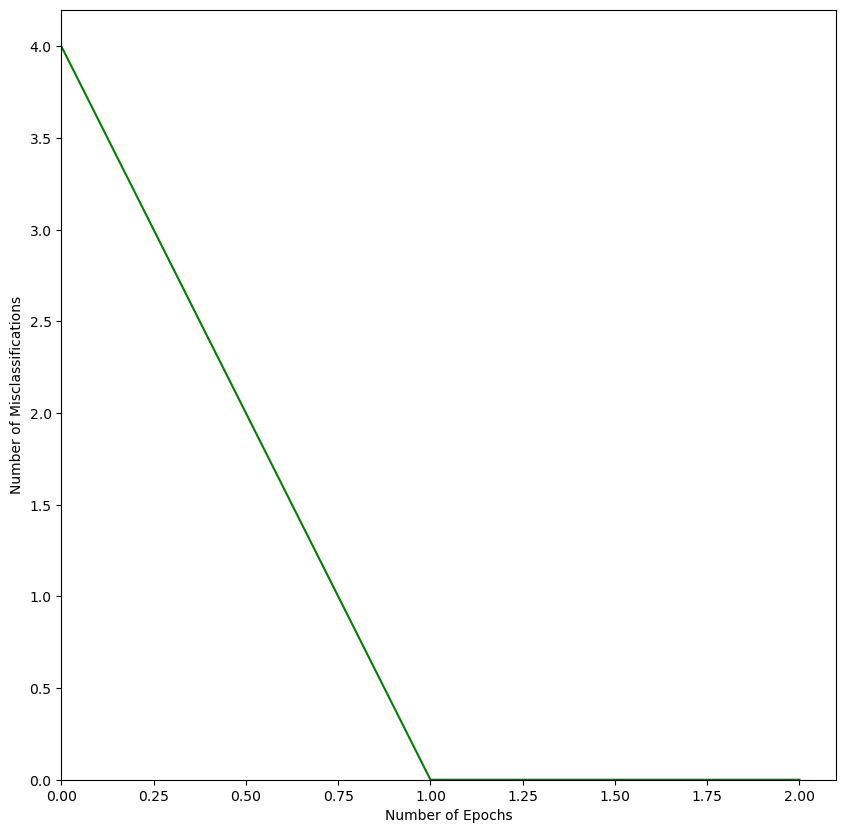

4 itr for taking AVG
Number of Misclassifications:  16


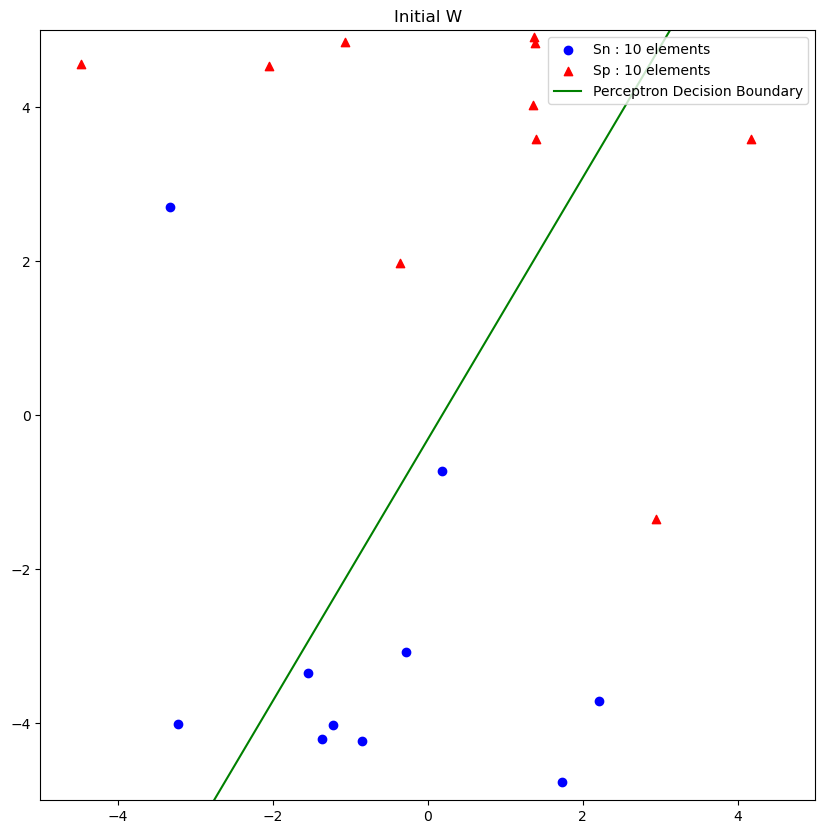

Updated weights:  [-1.1003430008164363, 1.7707867205795795, 3.697599629995086]
Updated weights:  [-2.1003430008164363, 5.101327882012127, 0.9894519909678636]
Updated weights:  [-3.1003430008164363, 2.8972588663960943, 4.695191235492041]
Updated weights:  [-2.1003430008164363, 5.848697811036101, 3.3437421528946176]
Updated weights:  [-1.1003430008164363, 1.376607719305336, 7.901182099263875]
Number of Misclassifications:  2
missed arry :  [16, 2]
Updated weights:  [-2.1003430008164363, 4.707148880737884, 5.193034460236652]
Number of Misclassifications:  0
missed arry :  [16, 2, 0]
Final weights:  [-2.1003430008164363, 4.707148880737884, 5.193034460236652]
Final res 
 W_vects:  [[-0.10034300081643621, 0.5445736873831566, -0.32040817091536633], [-1.1003430008164363, 1.376607719305336, 7.901182099263875], [-2.1003430008164363, 4.707148880737884, 5.193034460236652]] miss: [16, 2, 0]


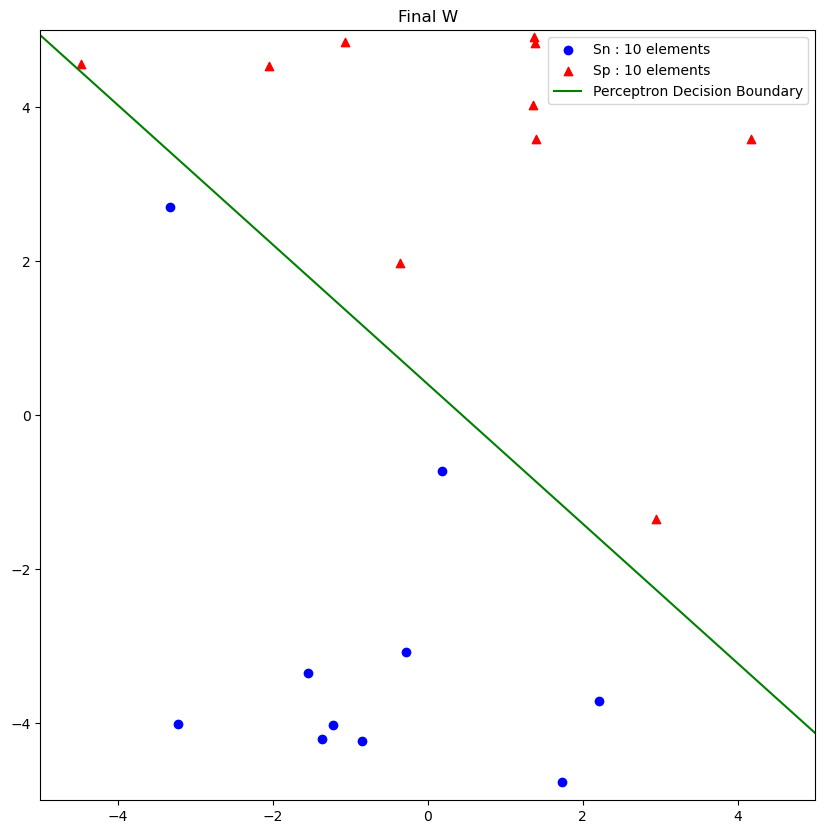

Number of Misclassifications:  11


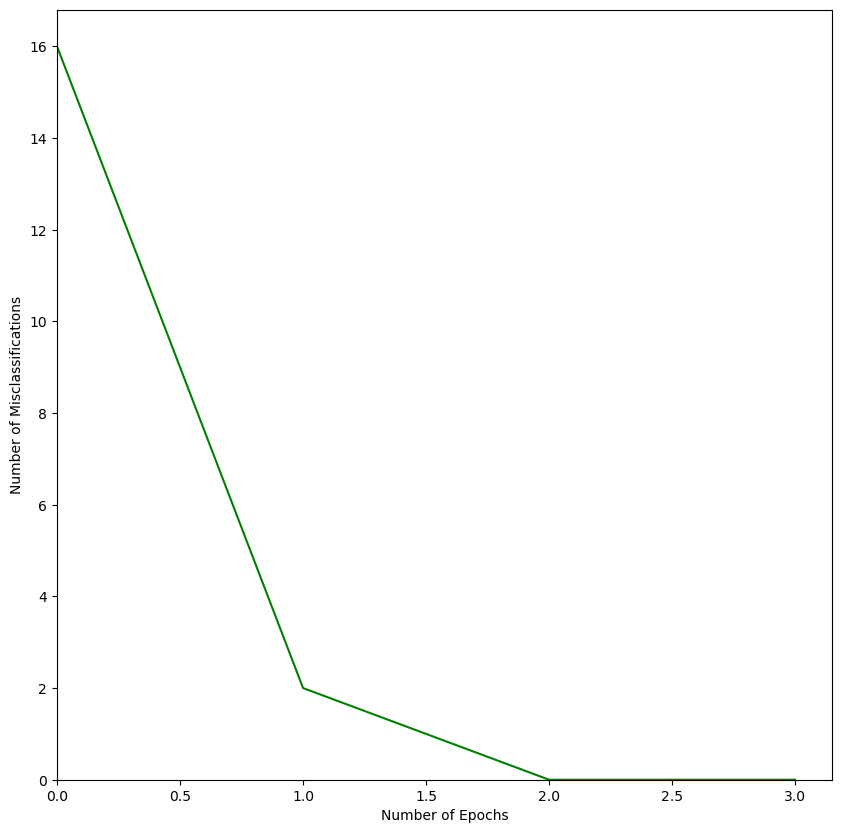

5 itr for taking AVG
Number of Misclassifications:  15


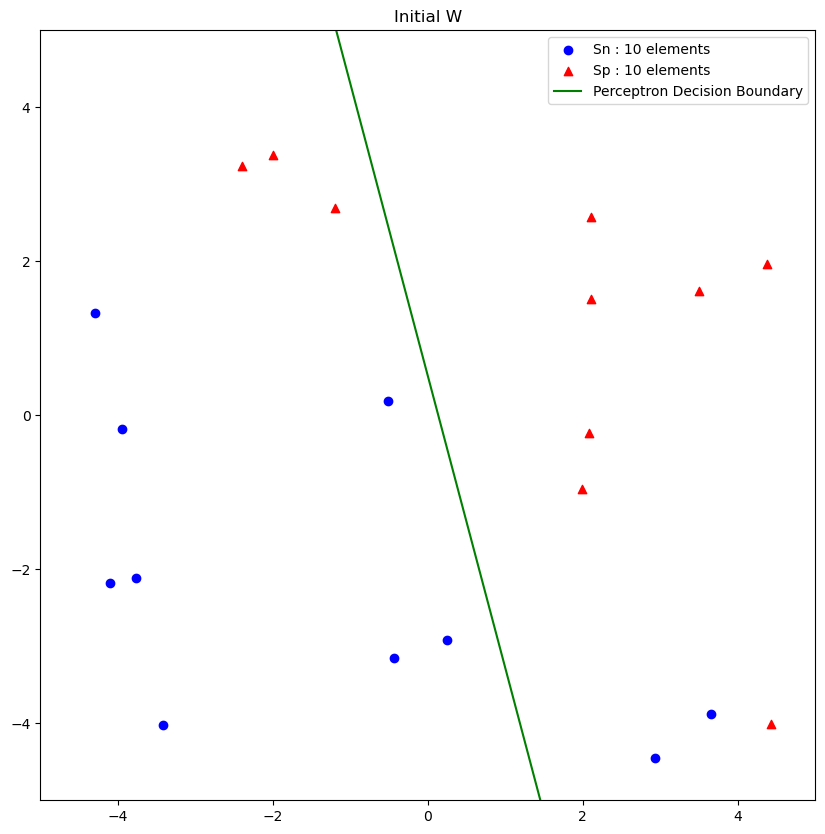

Updated weights:  [-0.919760490880251, 3.3606583436797486, 0.020091316884399024]
Updated weights:  [-1.919760490880251, -0.2967011364709773, 3.8986603433695923]
Updated weights:  [-0.919760490880251, 4.138896590476287, -0.11392872233761997]
Updated weights:  [0.08023950911974898, 1.7470608856768939, 3.120152557833203]
Number of Misclassifications:  1
missed arry :  [15, 1]
Updated weights:  [1.080239509119749, 6.1826586126241585, -0.8924365078740091]
Updated weights:  [2.0802395091197488, 3.790822907824765, 2.341644772296814]
Number of Misclassifications:  3
missed arry :  [15, 1, 3]
Updated weights:  [1.0802395091197488, 4.309518965205627, 2.1571681107113085]
Updated weights:  [0.08023950911974875, 0.6521594850549013, 6.035737137196502]
Updated weights:  [1.0802395091197488, 5.087757212002166, 2.02314807148929]
Updated weights:  [2.0802395091197488, 2.6959215072027725, 5.257229351660113]
Number of Misclassifications:  2
missed arry :  [15, 1, 3, 2]
Updated weights:  [1.080239509119748

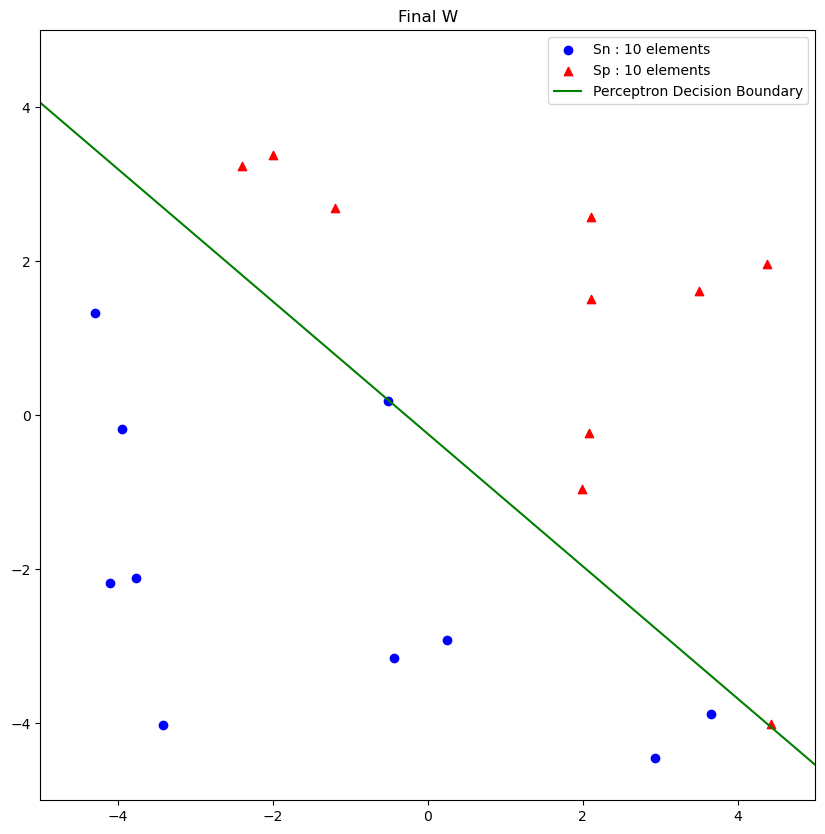

Number of Misclassifications:  17


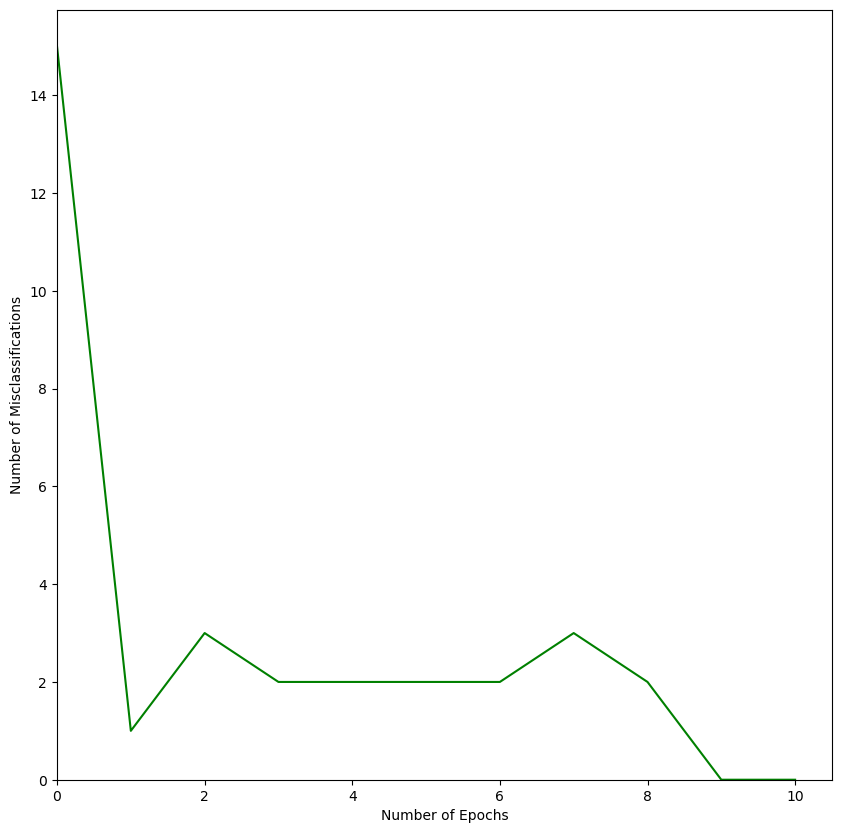

6 itr for taking AVG
Number of Misclassifications:  15


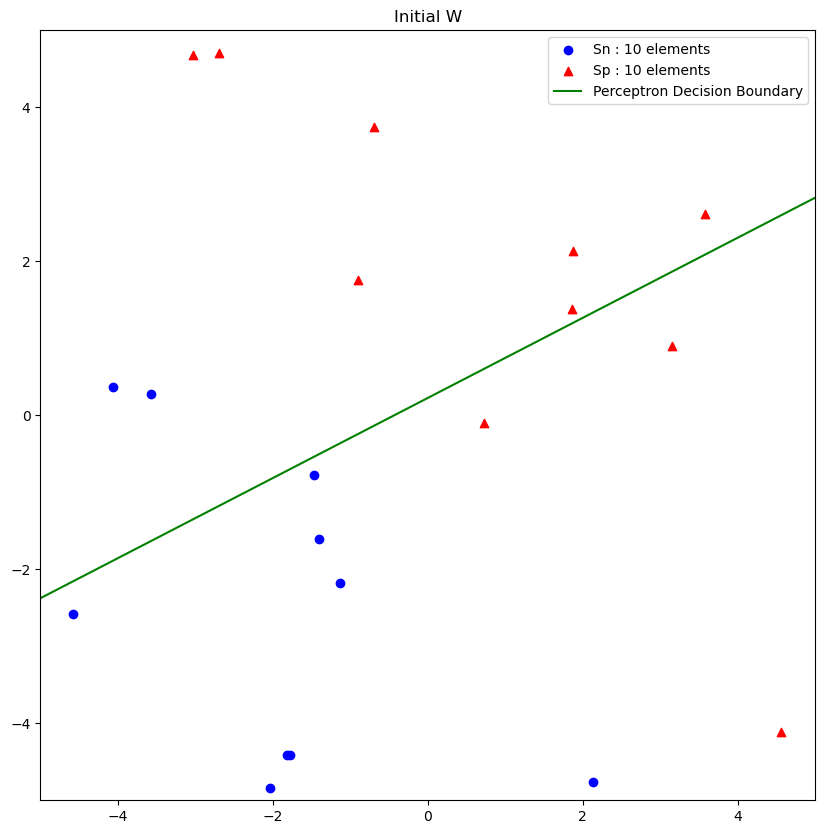

Updated weights:  [-0.931511453098304, 1.6279048785535077, 0.47620657061148397]
Updated weights:  [-1.931511453098304, -0.5023110099323991, 5.238435931884853]
Updated weights:  [-2.931511453098304, 3.0654977310348386, 4.967525823056177]
Updated weights:  [-1.9315114530983042, 3.7971640316788324, 4.8664952705998825]
Updated weights:  [-0.9315114530983042, 8.358104006668553, 0.7532123352821678]
Number of Misclassifications:  5
missed arry :  [15, 5]
Updated weights:  [-1.9315114530983042, 6.227888118182646, 5.515441696555537]
Number of Misclassifications:  0
missed arry :  [15, 5, 0]
Final weights:  [-1.9315114530983042, 6.227888118182646, 5.515441696555537]
Final res 
 W_vects:  [[0.06848854690169609, 0.15861379627672223, -0.30483793730203135], [-0.9315114530983042, 8.358104006668553, 0.7532123352821678], [-1.9315114530983042, 6.227888118182646, 5.515441696555537]] miss: [15, 5, 0]


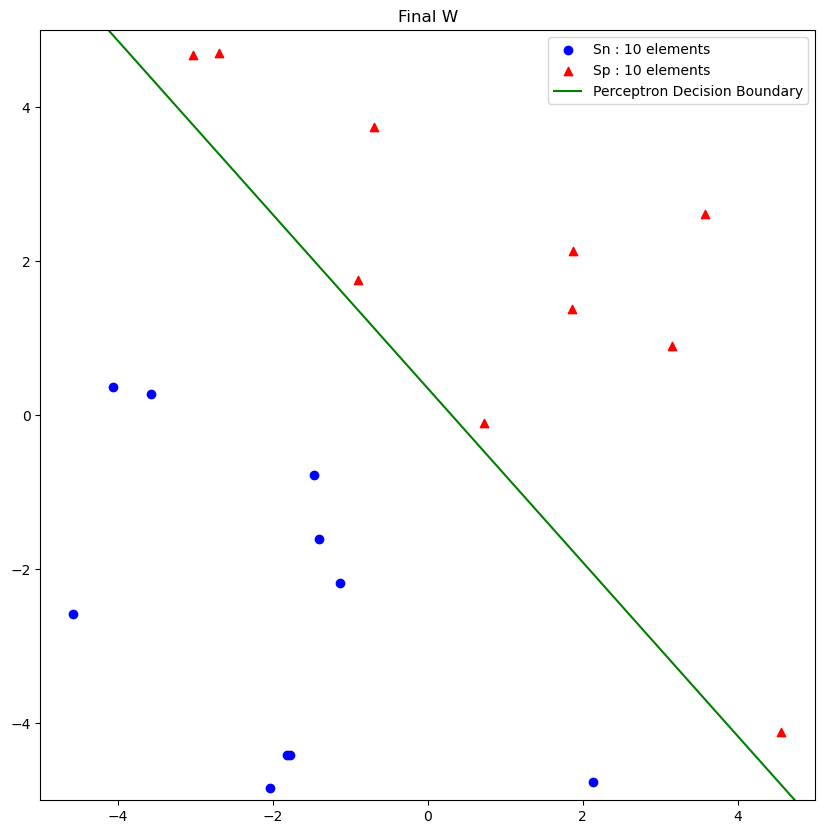

Number of Misclassifications:  16


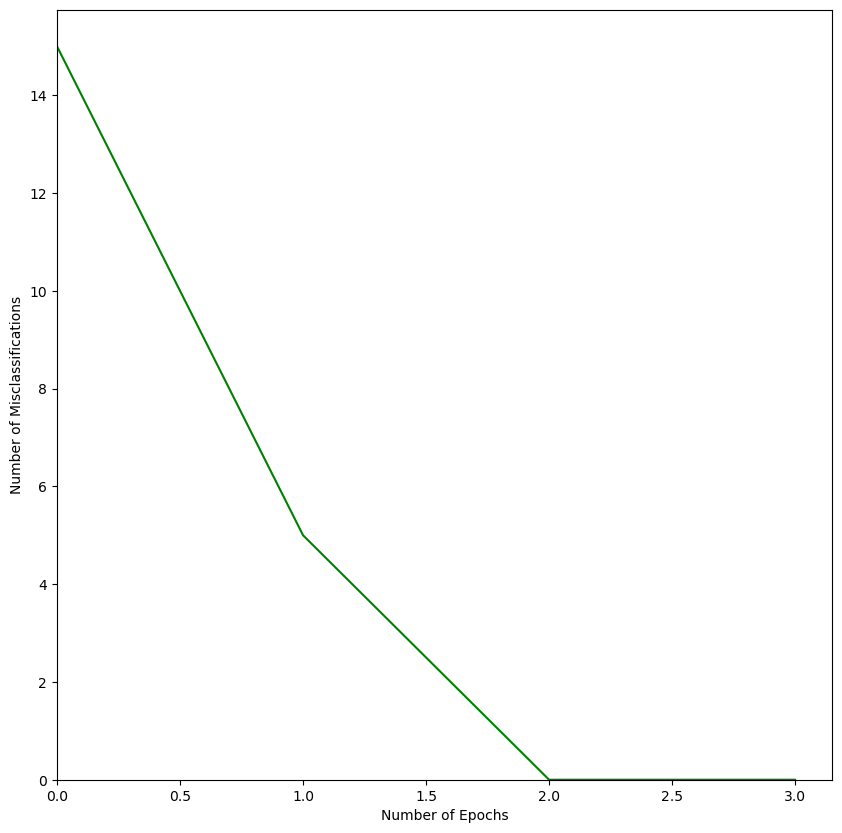

7 itr for taking AVG
Number of Misclassifications:  6


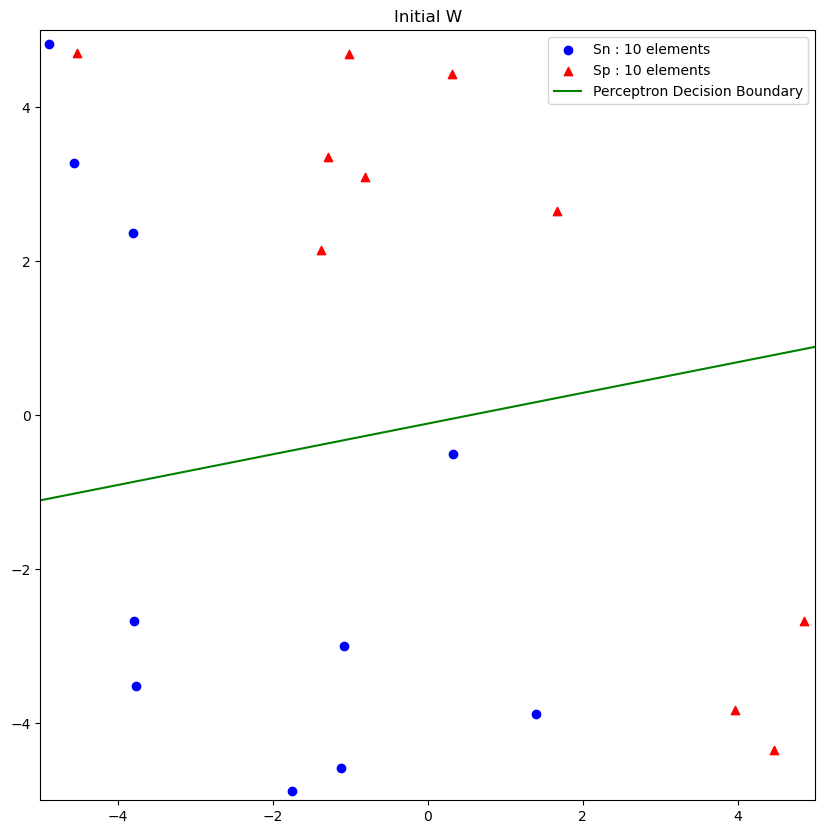

Updated weights:  [-0.9410533298034089, 4.774560515913766, -4.271263517935278]
Updated weights:  [-1.941053329803409, 5.860224198051435, -1.271768280089506]
Updated weights:  [-2.9410533298034087, 4.458152887559155, 2.6025059807442803]
Updated weights:  [-1.9410533298034087, -0.06790162302413538, 7.311458486805548]
Updated weights:  [-0.9410533298034087, 4.401688086136439, 2.9685171904728263]
Number of Misclassifications:  2
missed arry :  [6, 2]
Updated weights:  [0.05894667019659128, -0.1243664244468512, 7.677469696534094]
Updated weights:  [1.0589466701965913, 4.3452232847137235, 3.334528400201372]
Number of Misclassifications:  2
missed arry :  [6, 2, 2]
Updated weights:  [0.05894667019659128, 4.0240029178567855, 3.838438261613933]
Updated weights:  [1.0589466701965913, -0.502051592726505, 8.5473907676752]
Updated weights:  [2.0589466701965913, 3.9675381164340697, 4.204449471342478]
Number of Misclassifications:  2
missed arry :  [6, 2, 2, 2]
Updated weights:  [1.0589466701965913, 

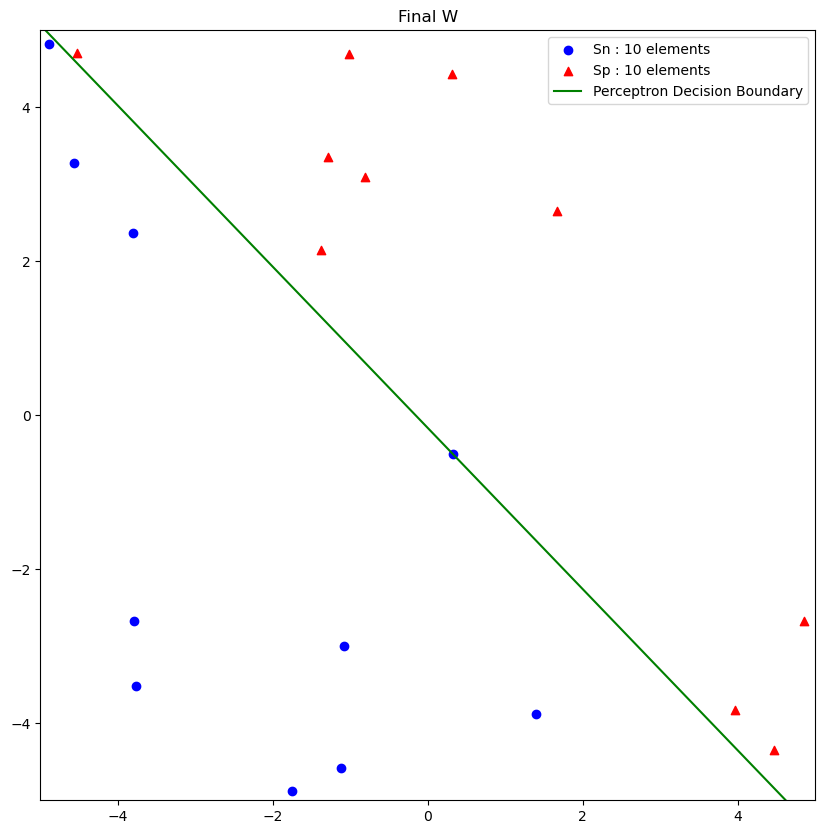

Number of Misclassifications:  5


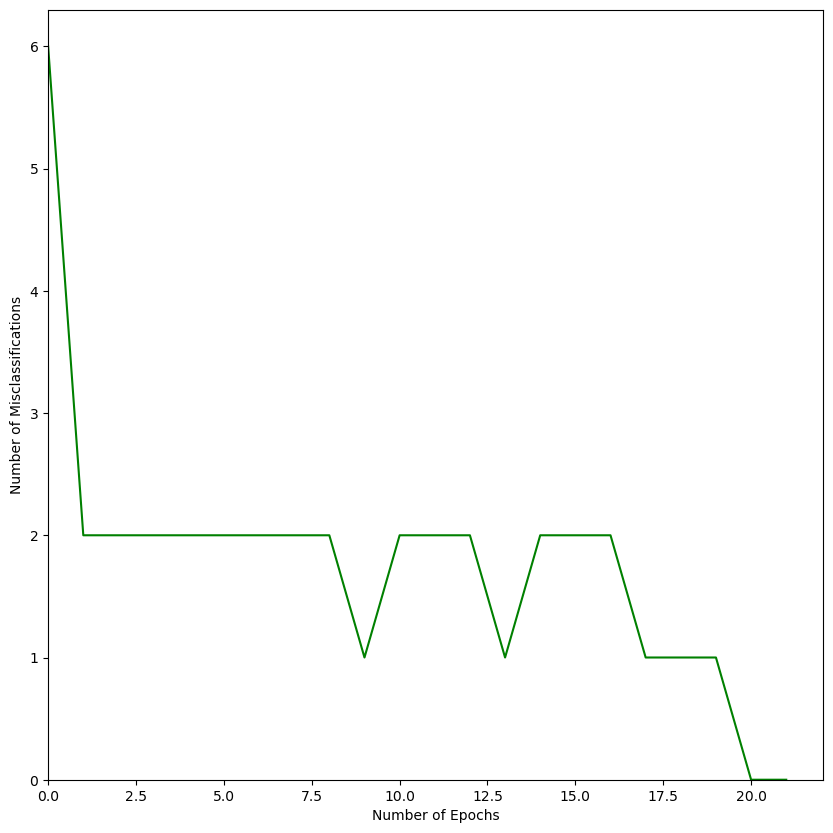

8 itr for taking AVG
Number of Misclassifications:  19


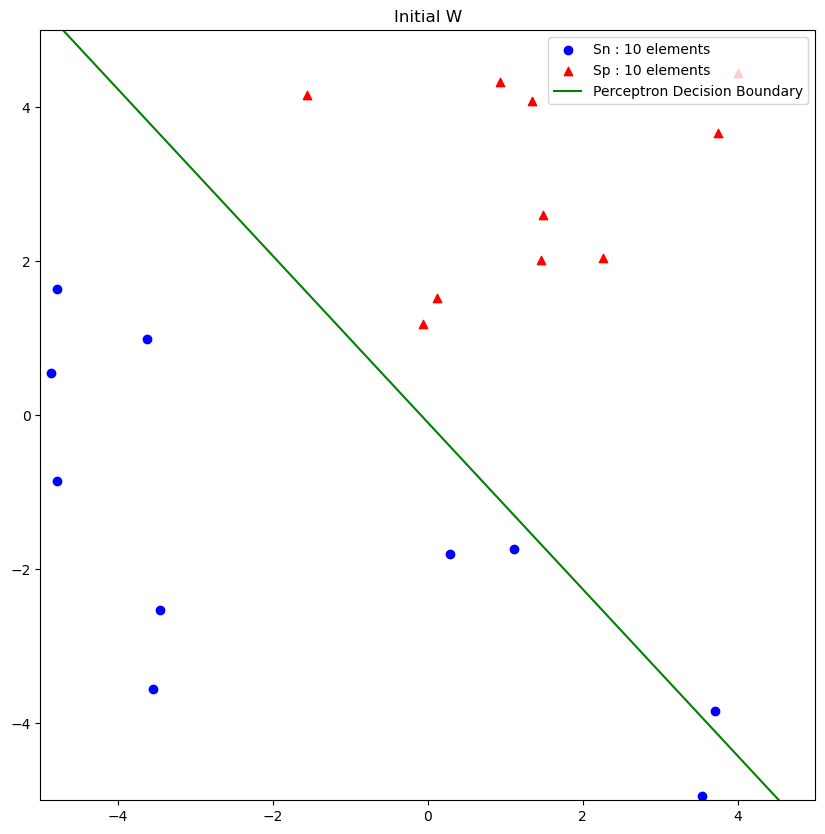

Updated weights:  [-1.059085370727943, 2.9414462443936378, -1.6247677351833862]
Updated weights:  [-2.059085370727943, -0.6024294046300431, 3.3188553307388107]
Updated weights:  [-3.059085370727943, 4.184461950688256, 1.6790120576719607]
Updated weights:  [-4.059085370727943, 0.47163497554324785, 5.519046656723706]
Number of Misclassifications:  1
missed arry :  [19, 1]
Updated weights:  [-5.059085370727943, 5.258526330861547, 3.879203383656856]
Updated weights:  [-4.059085370727943, 5.197728325705881, 5.070998760763896]
Number of Misclassifications:  0
missed arry :  [19, 1, 0]
Final weights:  [-4.059085370727943, 5.197728325705881, 5.070998760763896]
Final res 
 W_vects:  [[-0.05908537072794301, -0.6871477801198183, -0.6347259398179259], [-4.059085370727943, 0.47163497554324785, 5.519046656723706], [-4.059085370727943, 5.197728325705881, 5.070998760763896]] miss: [19, 1, 0]


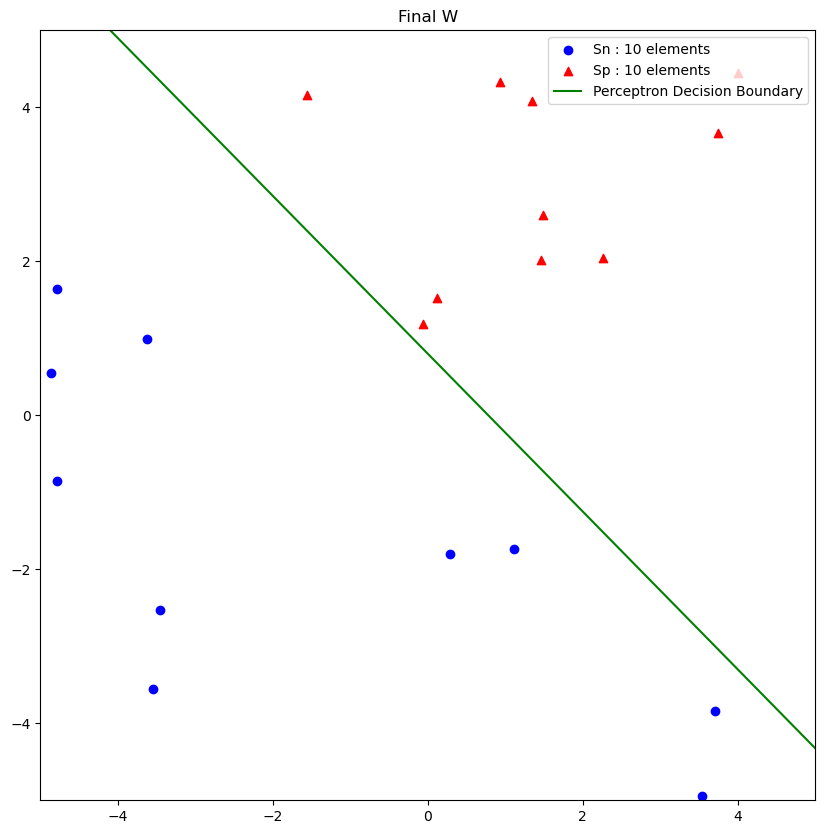

Number of Misclassifications:  20


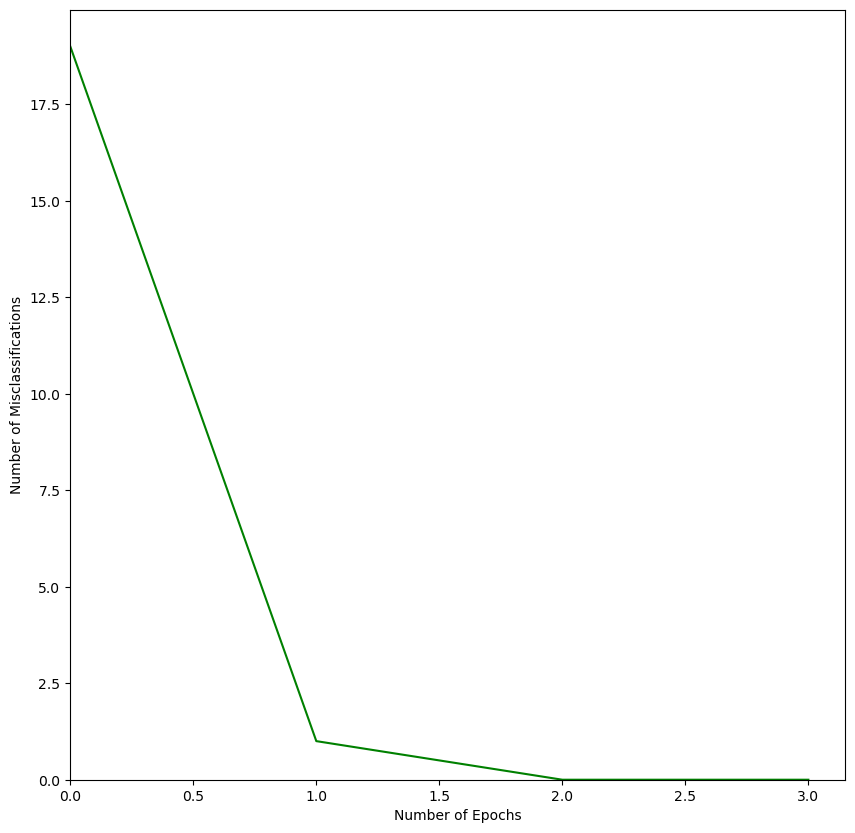

9 itr for taking AVG
Number of Misclassifications:  9


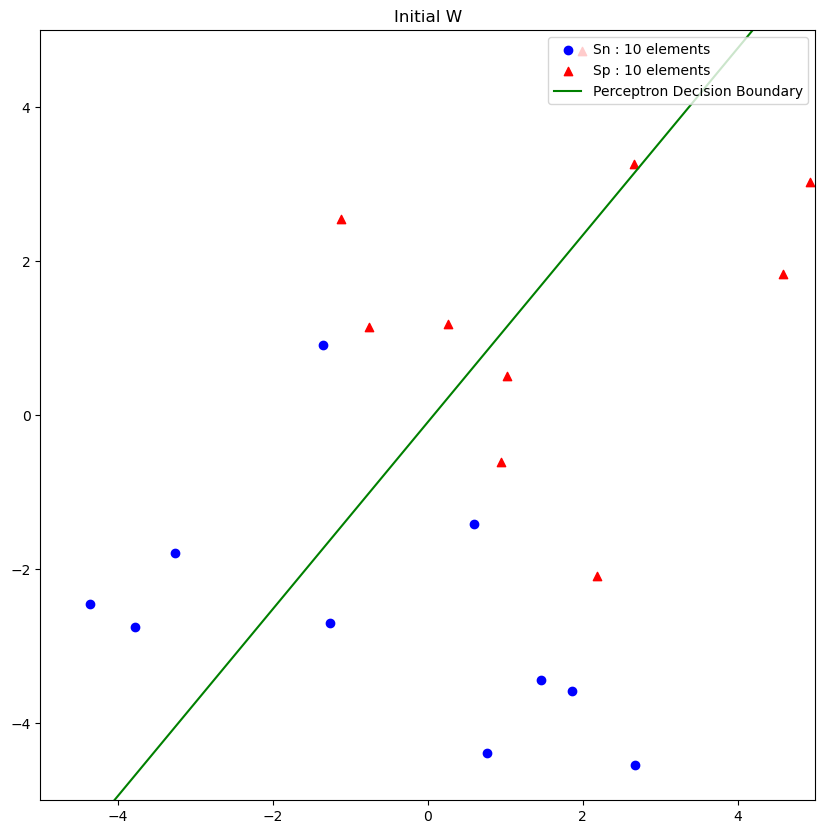

Updated weights:  [-0.9692967691500146, 3.9456664849857708, 2.7938154070802836]
Updated weights:  [0.030703230849985386, 3.1836110423657926, 3.9412708064725015]
Number of Misclassifications:  1
missed arry :  [9, 1]
Updated weights:  [1.0307032308499853, 5.370112984987522, 1.8549830673964522]
Updated weights:  [2.0307032308499853, 4.608057542367544, 3.00243846678867]
Number of Misclassifications:  2
missed arry :  [9, 1, 2]
Updated weights:  [1.0307032308499853, 4.014839516575711, 4.41274885723873]
Number of Misclassifications:  0
missed arry :  [9, 1, 2, 0]
Final weights:  [1.0307032308499853, 4.014839516575711, 4.41274885723873]
Final res 
 W_vects:  [[0.030703230849985386, -0.41460864356084226, 0.3414723214280222], [0.030703230849985386, 3.1836110423657926, 3.9412708064725015], [2.0307032308499853, 4.608057542367544, 3.00243846678867], [1.0307032308499853, 4.014839516575711, 4.41274885723873]] miss: [9, 1, 2, 0]


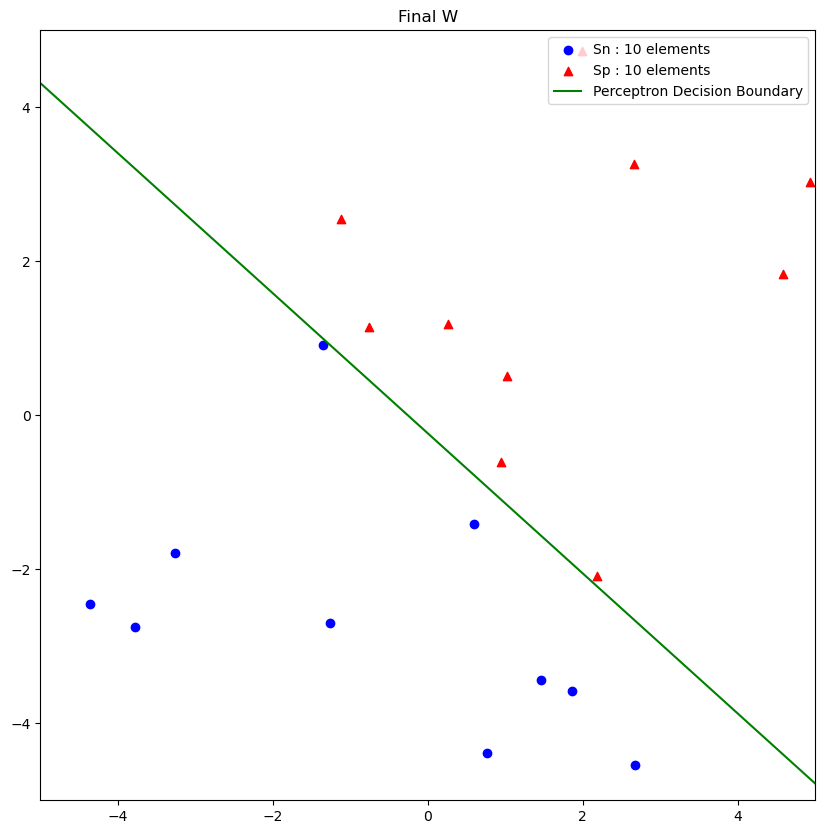

Number of Misclassifications:  9


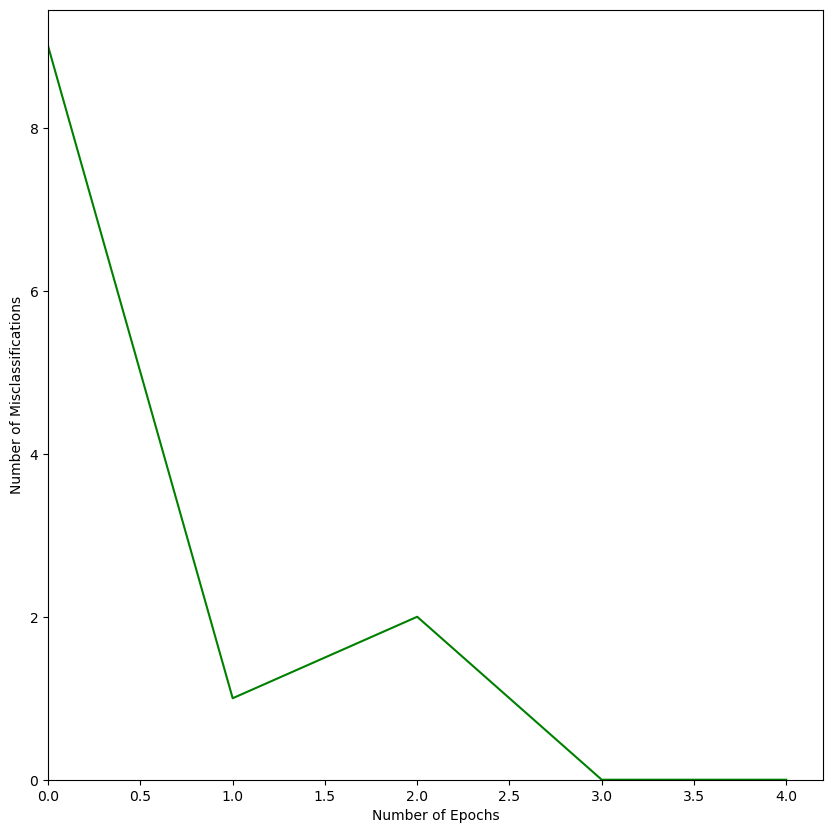

0 itr for taking AVG
Number of Misclassifications:  1


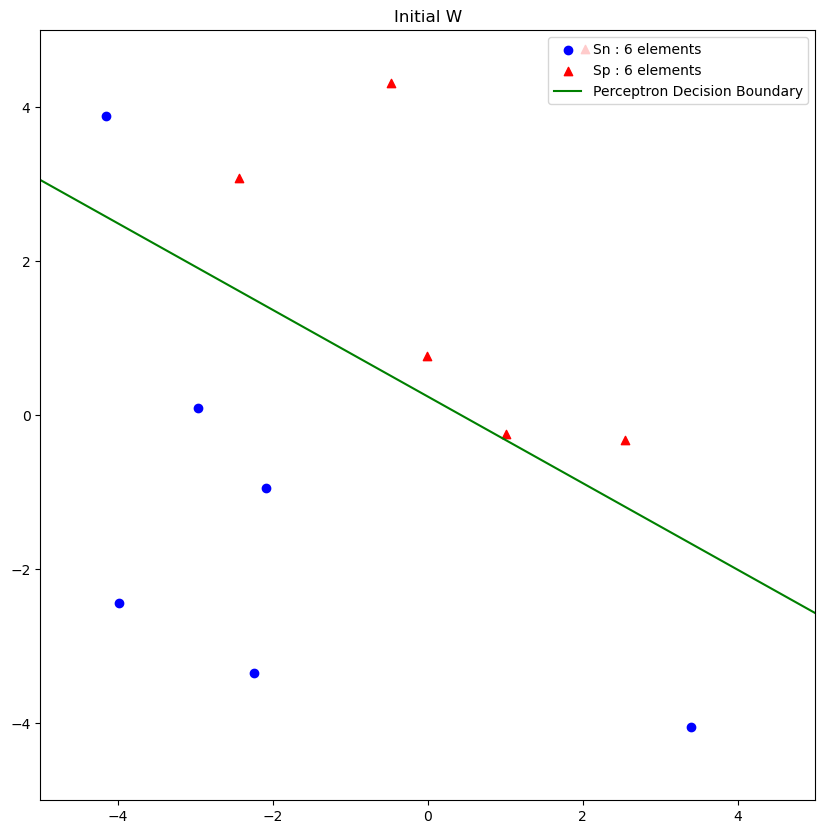

Updated weights:  [-1.2385049365964775, 4.697947702008511, -2.9040361462950024]
Updated weights:  [-0.23850493659647753, 2.262518581778153, 0.1812954459726157]
Updated weights:  [0.7614950634035225, 2.251649401212614, 0.9507450911717941]
Number of Misclassifications:  2
missed arry :  [1, 2]
Updated weights:  [-0.23850493659647753, -1.1449801615000563, 4.9972165070751515]
Updated weights:  [-1.2385049365964775, 3.0028659780261107, 1.1152761909907252]
Updated weights:  [-0.23850493659647753, 0.5674368577957525, 4.200607783258343]
Updated weights:  [0.7614950634035225, 3.1142247405643566, 3.880623410472948]
Number of Misclassifications:  1
missed arry :  [1, 2, 1]
Updated weights:  [-0.23850493659647753, 7.262070880090524, -0.0013169056114783473]
Updated weights:  [0.7614950634035225, 4.826641759860165, 3.0840146866561398]
Number of Misclassifications:  2
missed arry :  [1, 2, 1, 2]
Updated weights:  [-0.23850493659647753, 1.4300121971474953, 7.130486102559497]
Updated weights:  [-1.2385

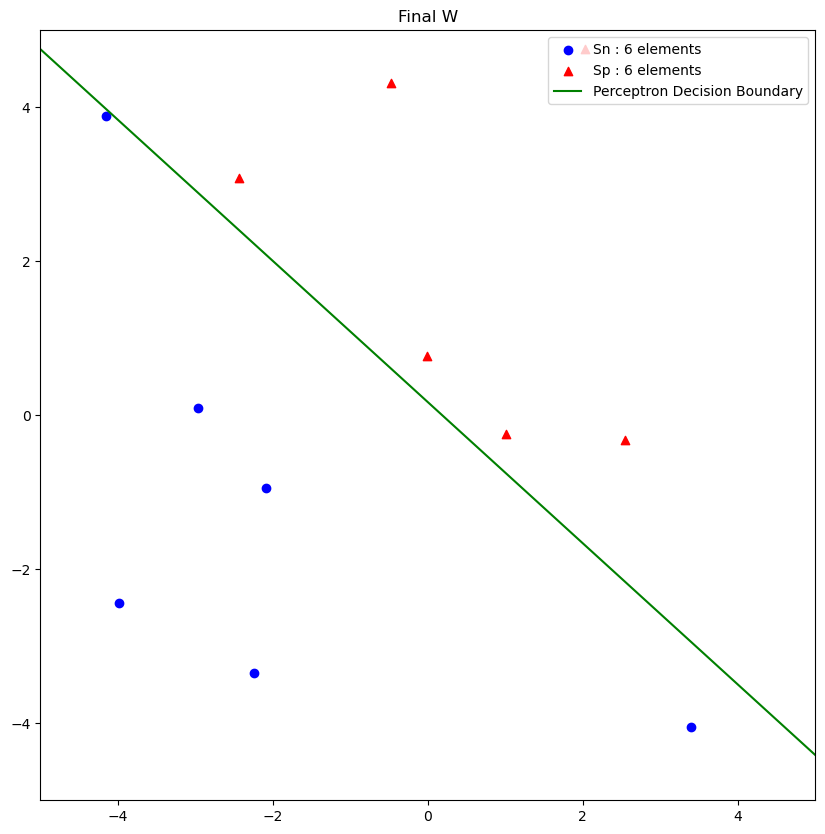

Number of Misclassifications:  1


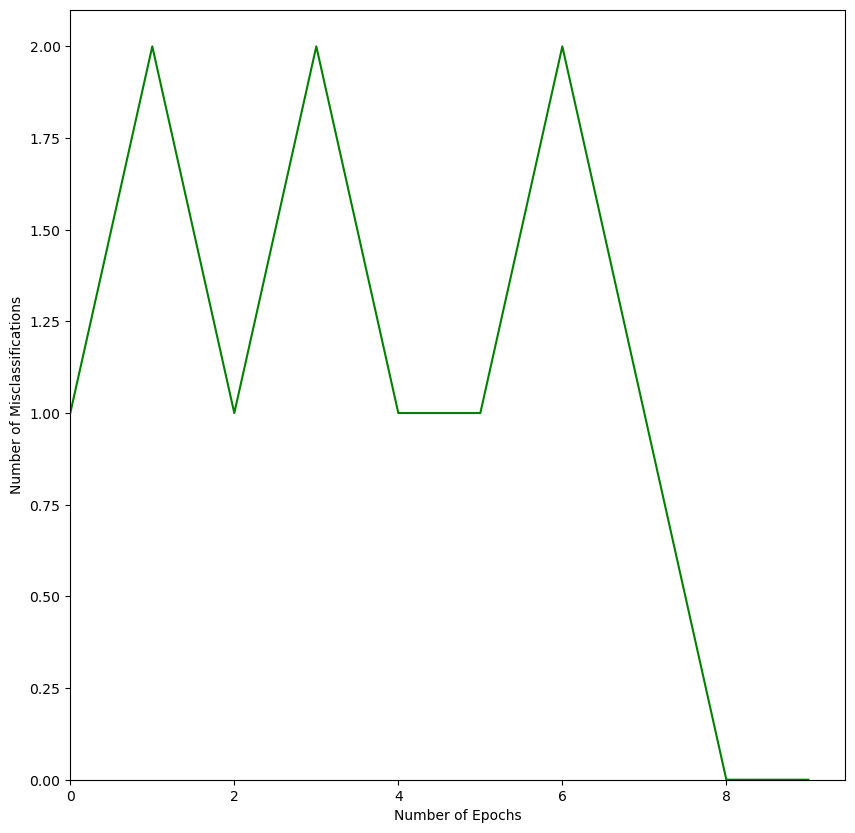

1 itr for taking AVG
Number of Misclassifications:  6


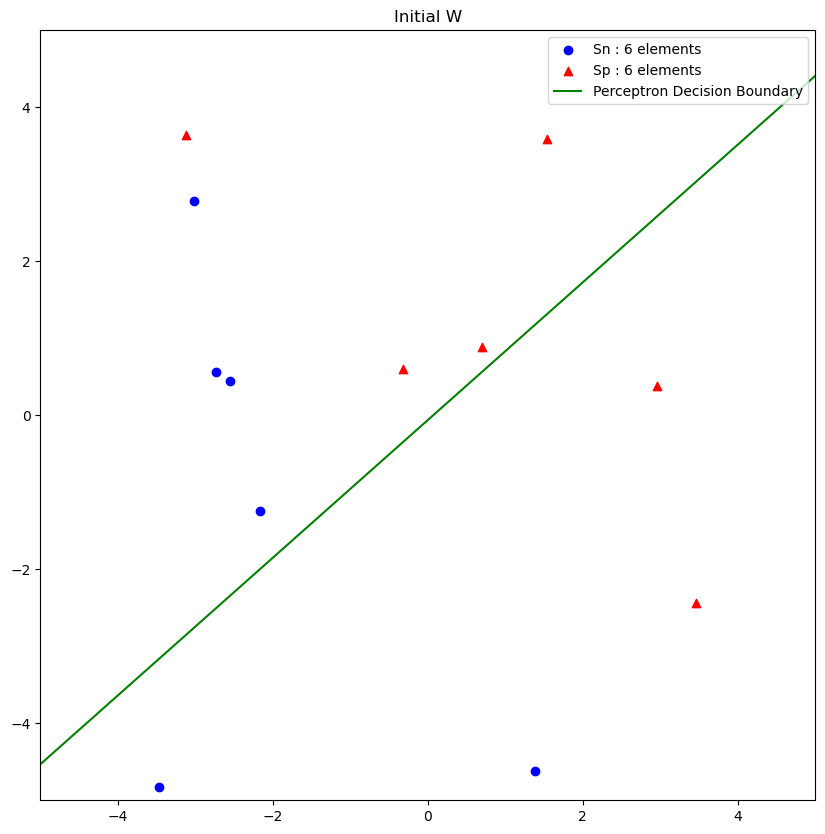

Updated weights:  [-0.9456322597655404, 1.3926556363482008, 2.1112498552930754]
Updated weights:  [-1.9456322597655404, 4.402732248207016, -0.6653668942375566]
Updated weights:  [-2.9456322597655404, 3.0249240205739856, 3.950398582287187]
Updated weights:  [-1.9456322597655404, 2.7061360321834727, 4.552125616776096]
Updated weights:  [-0.9456322597655404, 6.173461172128082, 2.1201359678675296]
Updated weights:  [0.05436774023445956, 3.0579184735086398, 5.758307564043614]
Number of Misclassifications:  2
missed arry :  [6, 2]
Updated weights:  [-0.9456322597655404, 6.067995085367455, 2.981690814512982]
Updated weights:  [0.05436774023445956, 5.749207096976942, 3.583417849001891]
Updated weights:  [1.0543677402344596, 2.6336643983575, 7.221589445177975]
Number of Misclassifications:  2
missed arry :  [6, 2, 2]
Updated weights:  [0.05436774023445956, 5.643741010216315, 4.444972695647343]
Updated weights:  [1.0543677402344596, 2.528198311596873, 8.083144291823427]
Number of Misclassificati

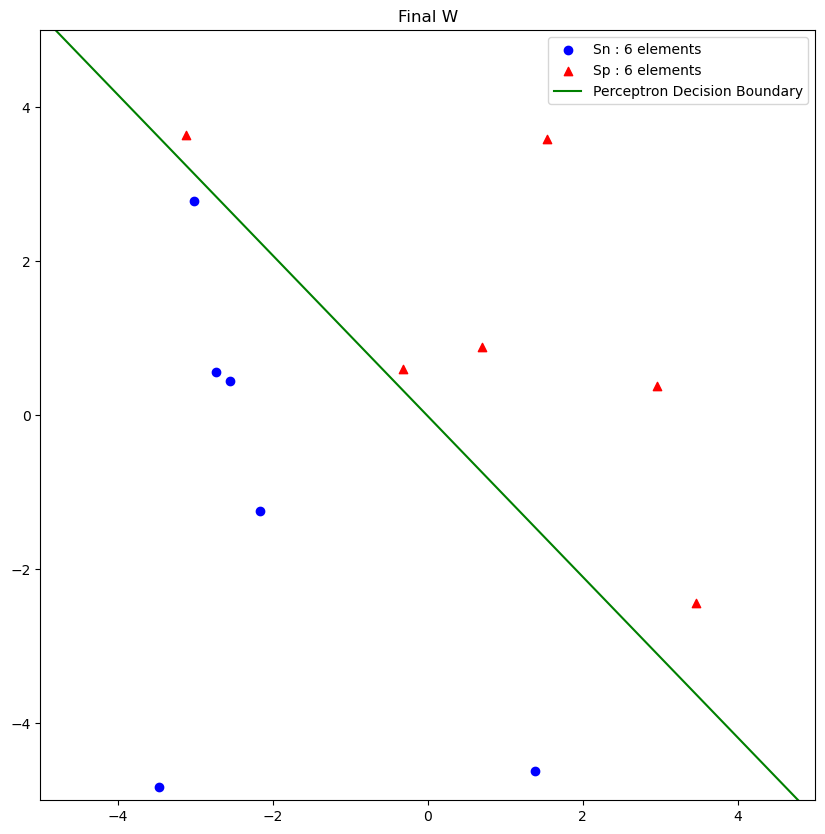

Number of Misclassifications:  12


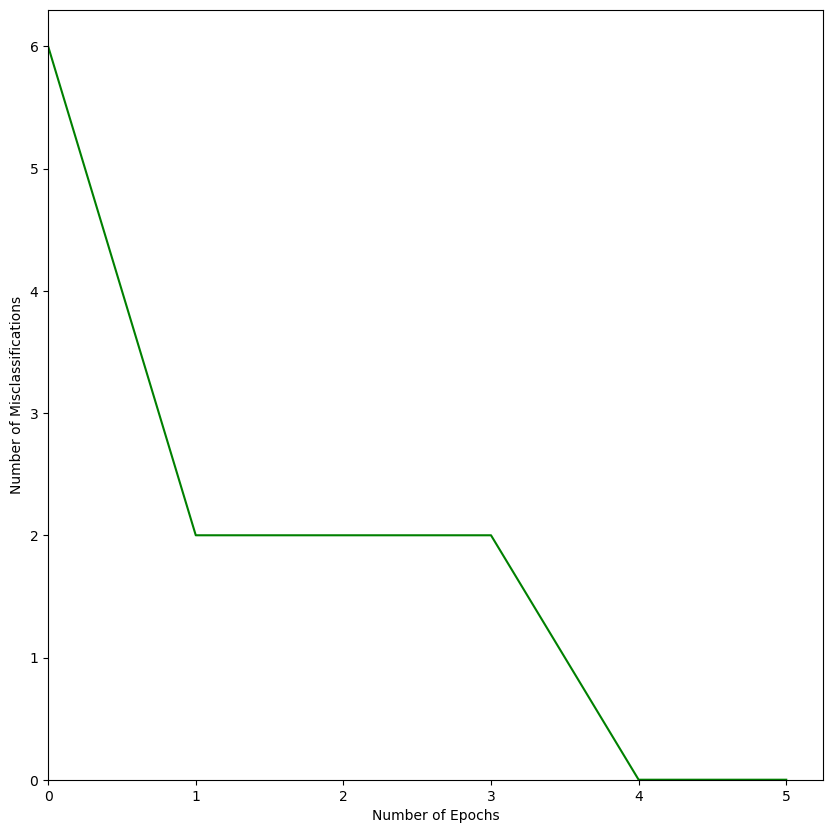

2 itr for taking AVG
Number of Misclassifications:  5


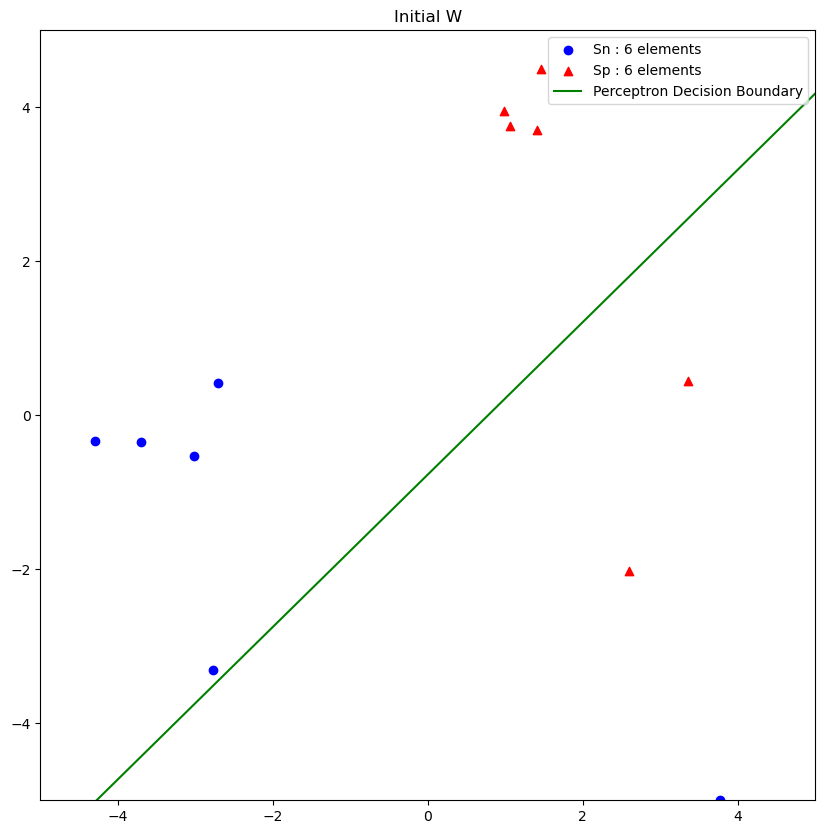

Updated weights:  [-1.194405349100367, -3.5217050649624797, 4.745043256625592]
Updated weights:  [-0.194405349100367, -0.16198107944870177, 5.19047945871271]
Updated weights:  [0.805594650899633, 2.4374604811530913, 3.172721258689352]
Number of Misclassifications:  0
missed arry :  [5, 0]
Final weights:  [0.805594650899633, 2.4374604811530913, 3.172721258689352]
Final res 
 W_vects:  [[-0.19440534910036705, 0.2497287037501923, -0.2522768576641139], [0.805594650899633, 2.4374604811530913, 3.172721258689352]] miss: [5, 0]


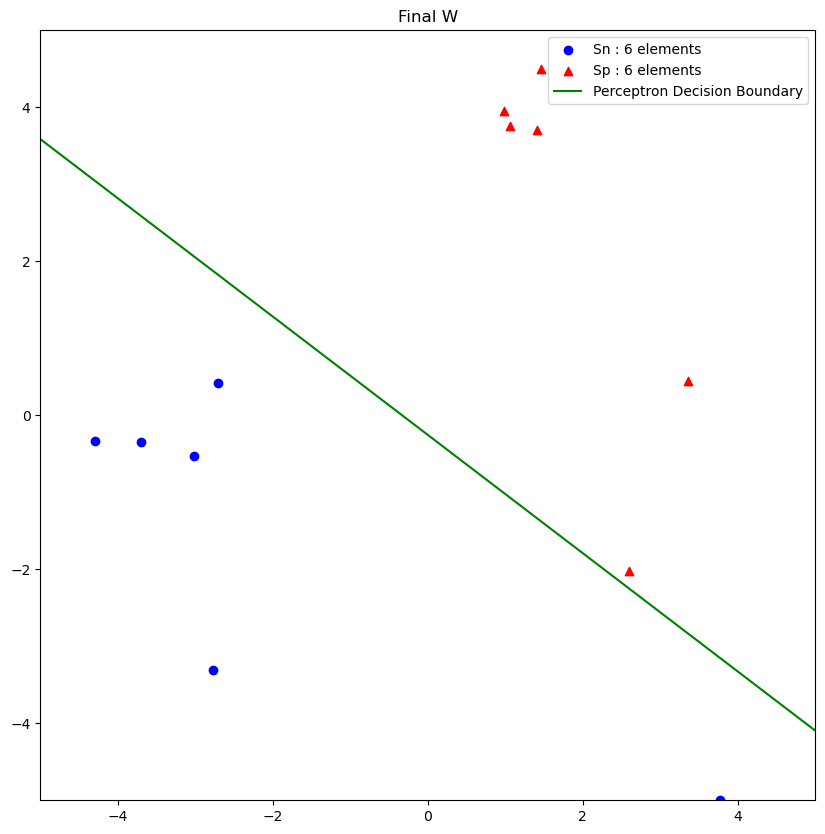

Number of Misclassifications:  9


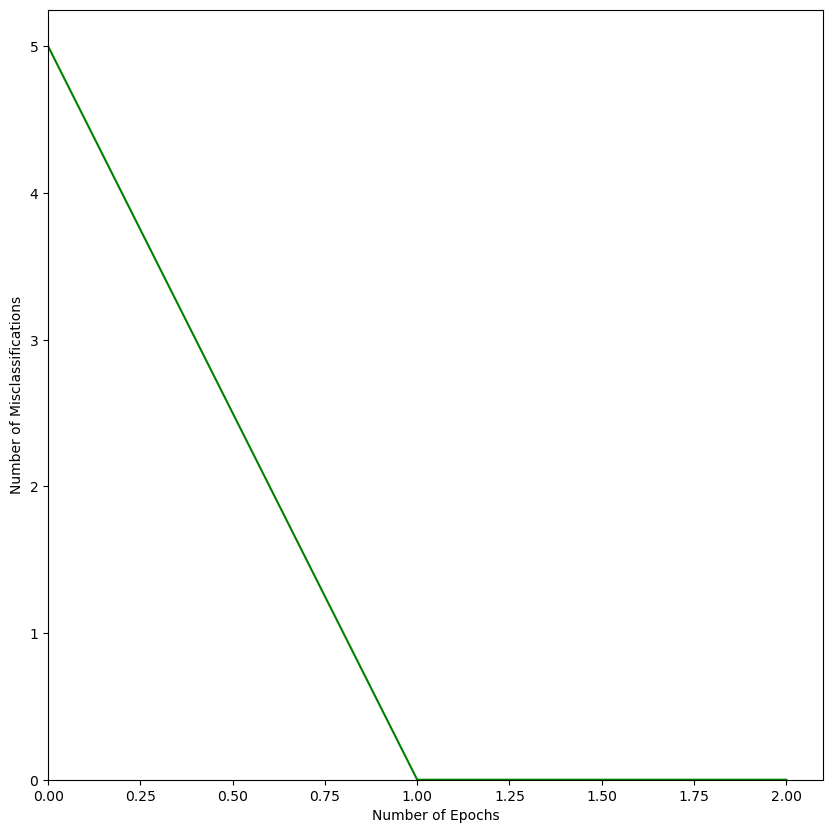

3 itr for taking AVG
Number of Misclassifications:  10


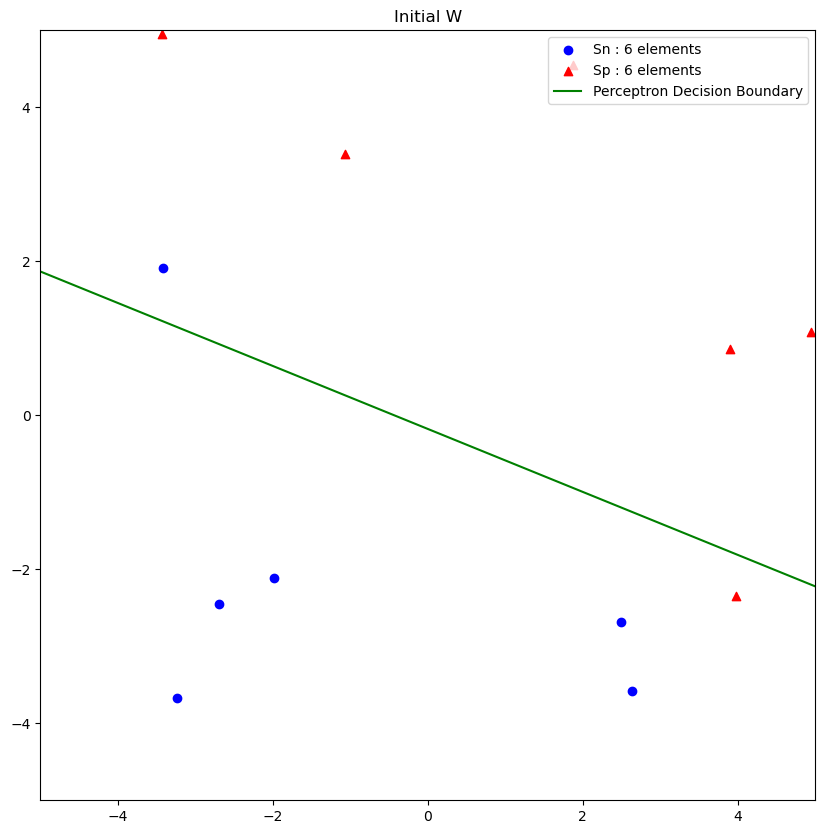

Updated weights:  [-1.1627927557058577, -3.015989671802714, 2.664205997473988]
Updated weights:  [-2.1627927557058575, -0.320071124386728, 5.116163270838978]
Updated weights:  [-3.1627927557058575, 3.094265896543881, 3.20695066527332]
Number of Misclassifications:  0
missed arry :  [10, 0]
Final weights:  [-3.1627927557058575, 3.094265896543881, 3.20695066527332]
Final res 
 W_vects:  [[-0.16279275570585766, -0.37631415276228686, -0.9201124011642257], [-3.1627927557058575, 3.094265896543881, 3.20695066527332]] miss: [10, 0]


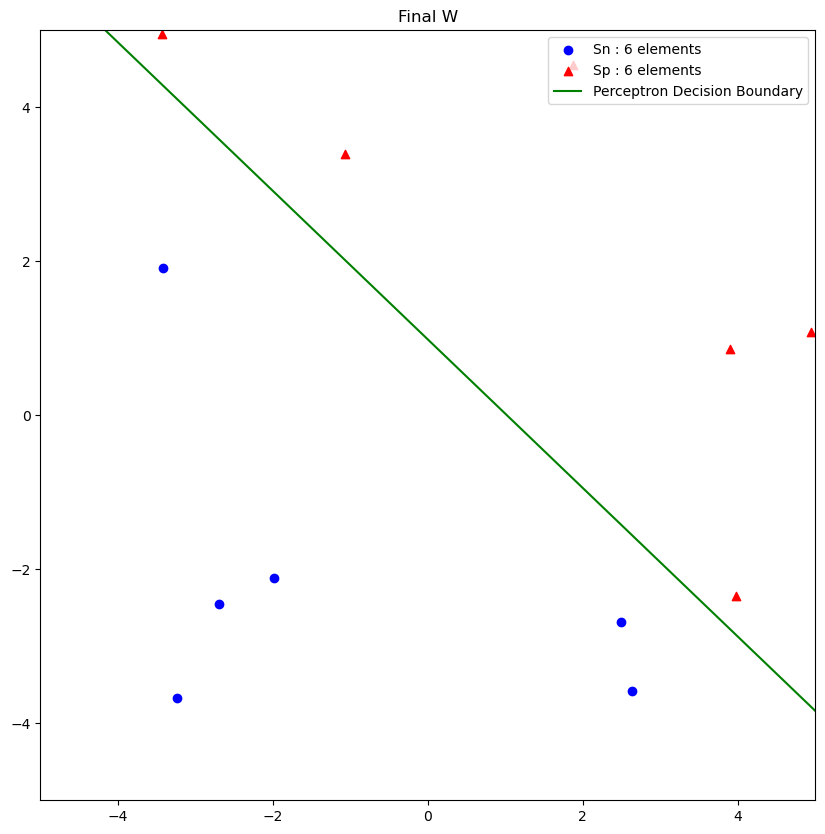

Number of Misclassifications:  16


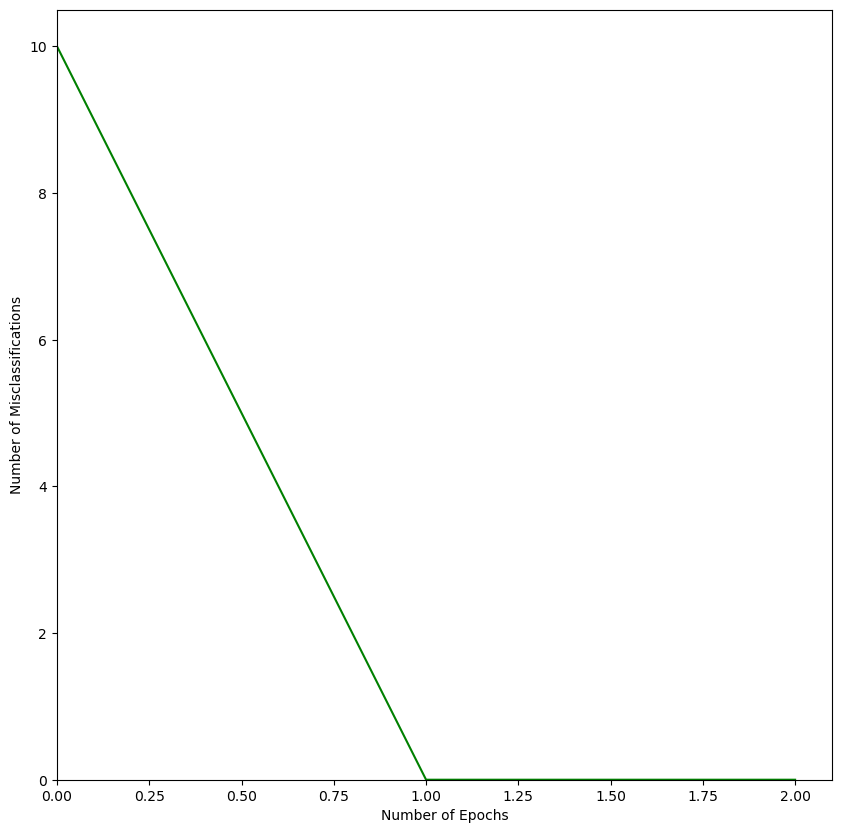

4 itr for taking AVG
Number of Misclassifications:  6


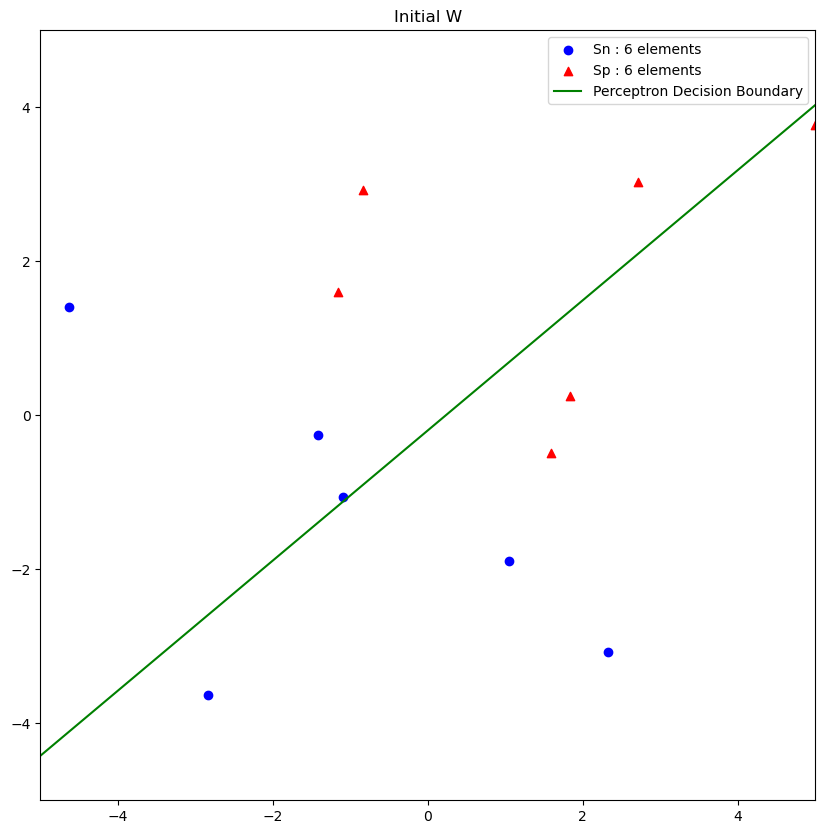

Updated weights:  [-1.1854054956071762, -0.2585530265036071, 0.9558274972346188]
Updated weights:  [-0.18540549560717623, 1.335995158121276, 0.4666068504441163]
Number of Misclassifications:  3
missed arry :  [6, 3]
Updated weights:  [-1.1854054956071762, 0.2832066668631186, 2.3621165502648926]
Updated weights:  [-0.18540549560717623, 1.8777548514880016, 1.8728959034743902]
Number of Misclassifications:  0
missed arry :  [6, 3, 0]
Final weights:  [-0.18540549560717623, 1.8777548514880016, 1.8728959034743902]
Final res 
 W_vects:  [[-0.18540549560717628, 0.7942354647545502, -0.9396822025861578], [-0.18540549560717623, 1.335995158121276, 0.4666068504441163], [-0.18540549560717623, 1.8777548514880016, 1.8728959034743902]] miss: [6, 3, 0]


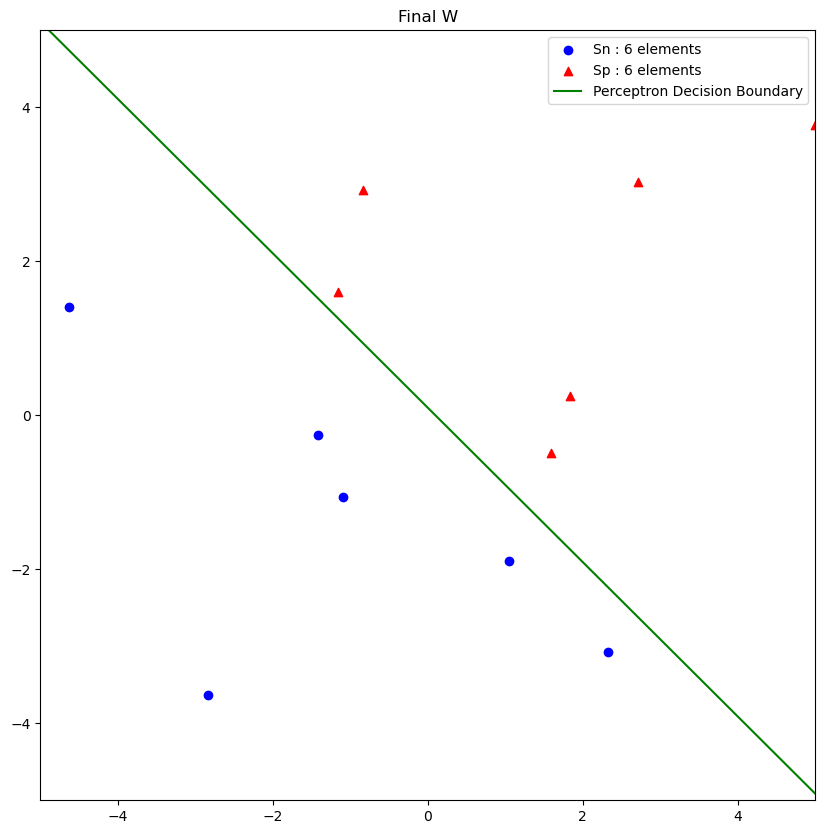

Number of Misclassifications:  7


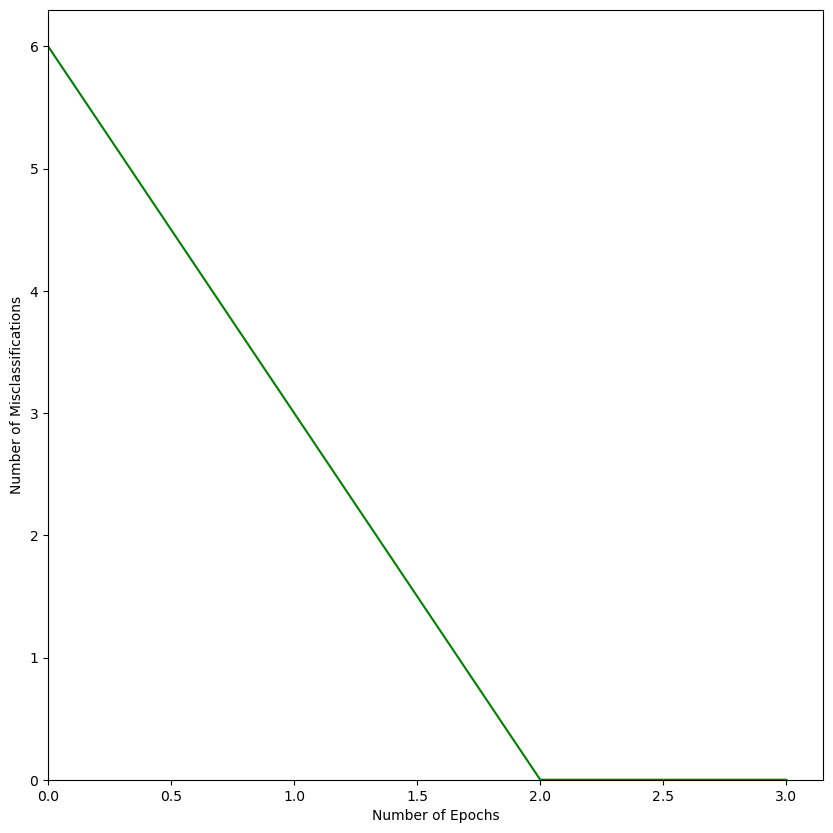

5 itr for taking AVG
Number of Misclassifications:  2


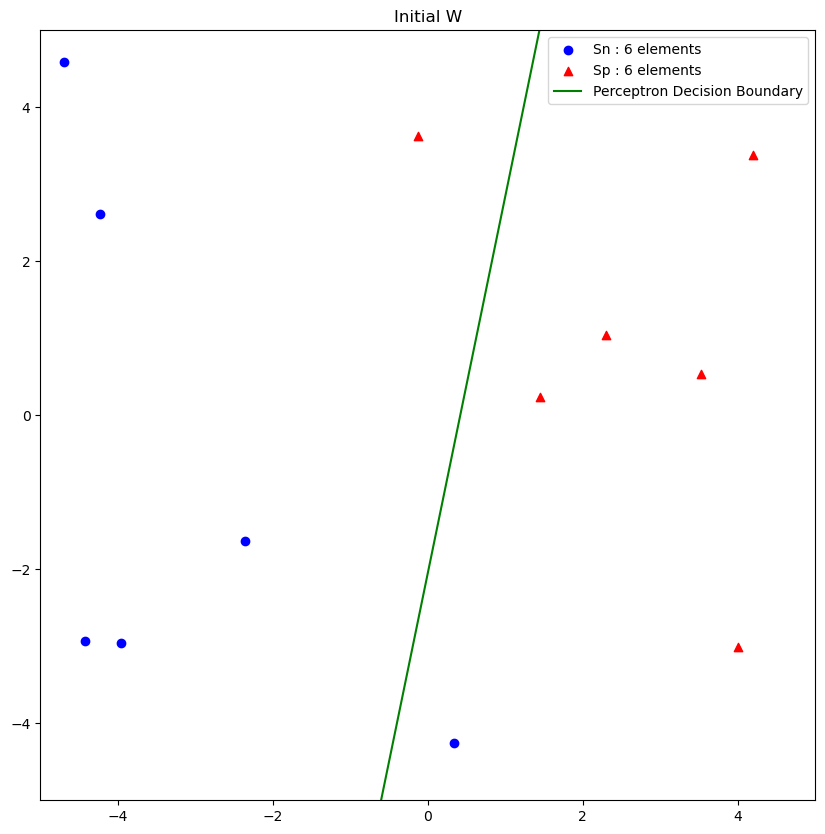

Updated weights:  [-1.0944219946346807, -0.11241904525389201, 4.213405476808793]
Updated weights:  [-0.0944219946346807, 3.896096351308609, 1.203107013365707]
Number of Misclassifications:  0
missed arry :  [2, 0]
Final weights:  [-0.0944219946346807, 3.896096351308609, 1.203107013365707]
Final res 
 W_vects:  [[-0.0944219946346807, 0.22499358719300333, -0.04596660284647469], [-0.0944219946346807, 3.896096351308609, 1.203107013365707]] miss: [2, 0]


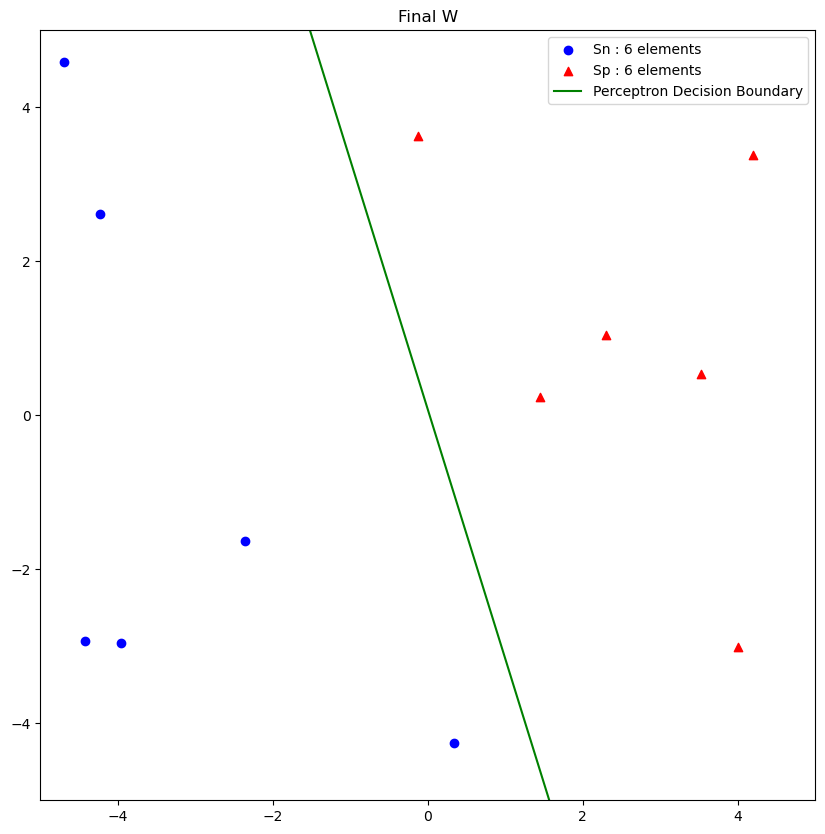

Number of Misclassifications:  9


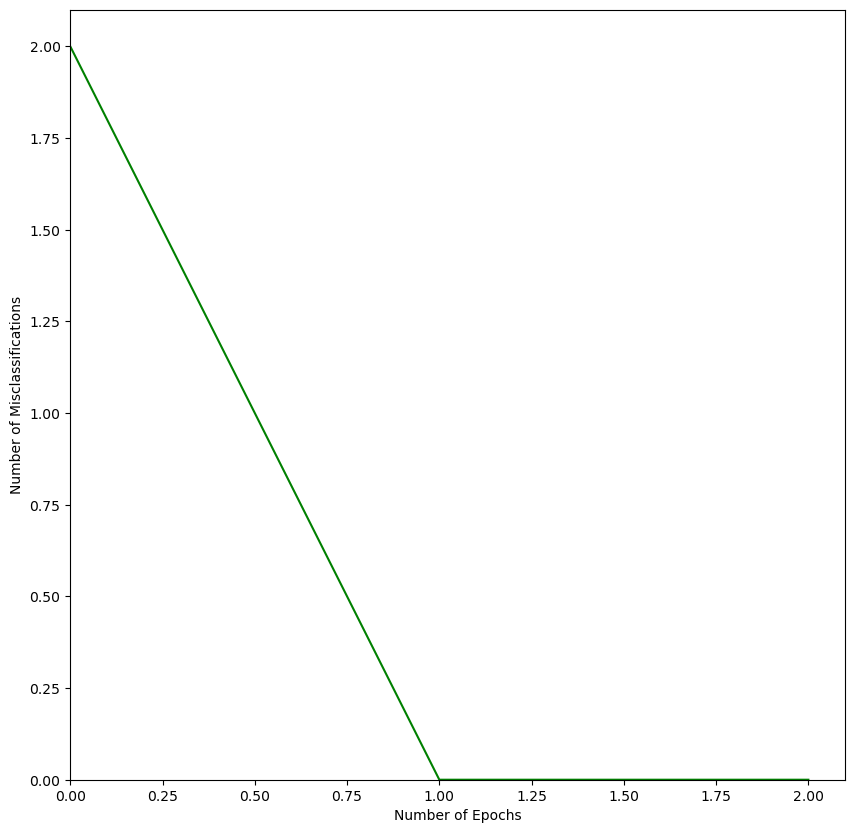

6 itr for taking AVG
Number of Misclassifications:  7


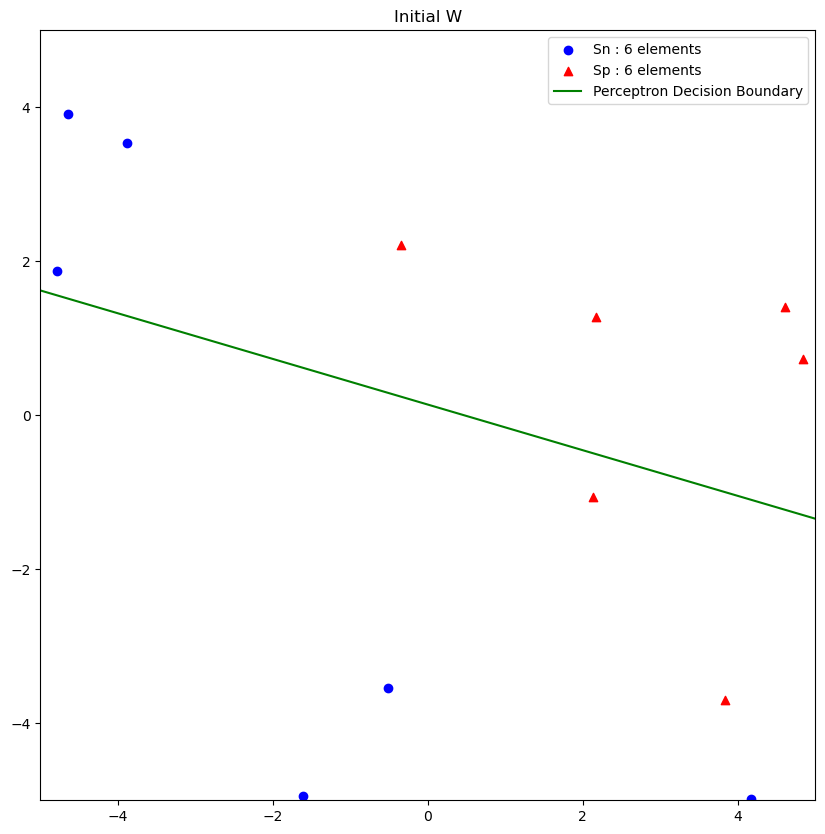

Updated weights:  [-0.8754238000381891, -4.436160245284397, 4.084382095165337]
Updated weights:  [-1.875423800038189, 0.2083173945110035, 0.16853167891581755]
Updated weights:  [-0.8754238000381891, 4.811951823758924, 1.5712768992613437]
Number of Misclassifications:  1
missed arry :  [7, 1]
Updated weights:  [-1.875423800038189, 0.6407035534164089, 6.549264372847071]
Updated weights:  [-2.875423800038189, 5.28518119321181, 2.6334139565975523]
Number of Misclassifications:  1
missed arry :  [7, 1, 1]
Updated weights:  [-3.875423800038189, 1.113932922869295, 7.61140143018328]
Updated weights:  [-4.875423800038189, 5.758410562664696, 3.695551013933761]
Number of Misclassifications:  1
missed arry :  [7, 1, 1, 1]
Updated weights:  [-5.875423800038189, 1.5871622923221809, 8.673538487519489]
Updated weights:  [-6.875423800038189, 6.231639932117582, 4.757688071269969]
Updated weights:  [-5.875423800038189, 10.064388769895146, 1.05574242541641]
Number of Misclassifications:  2
missed arry :  

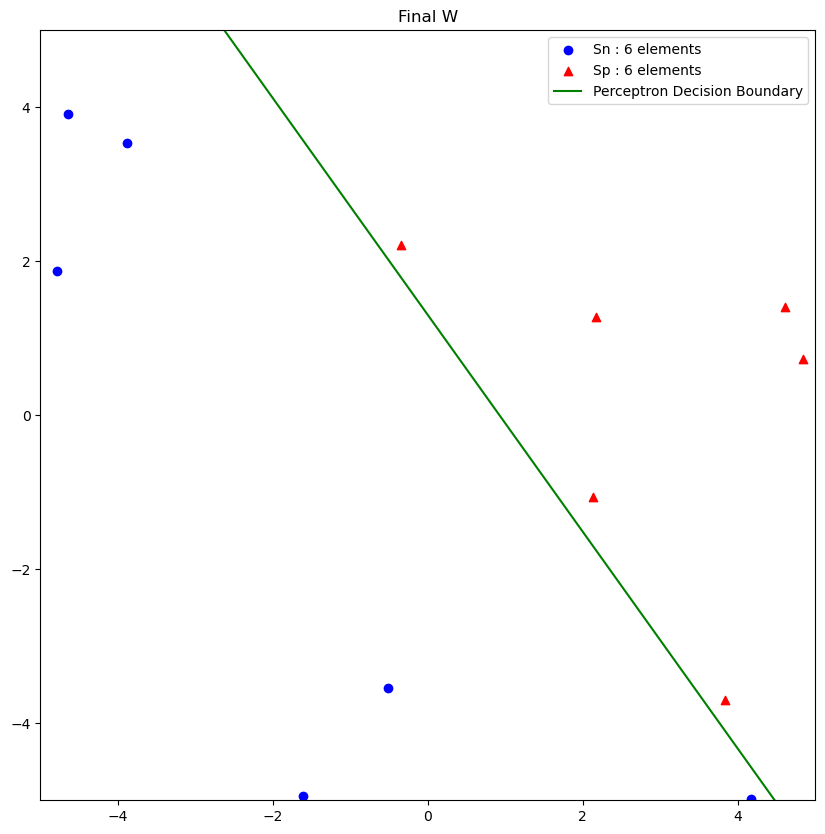

Number of Misclassifications:  16


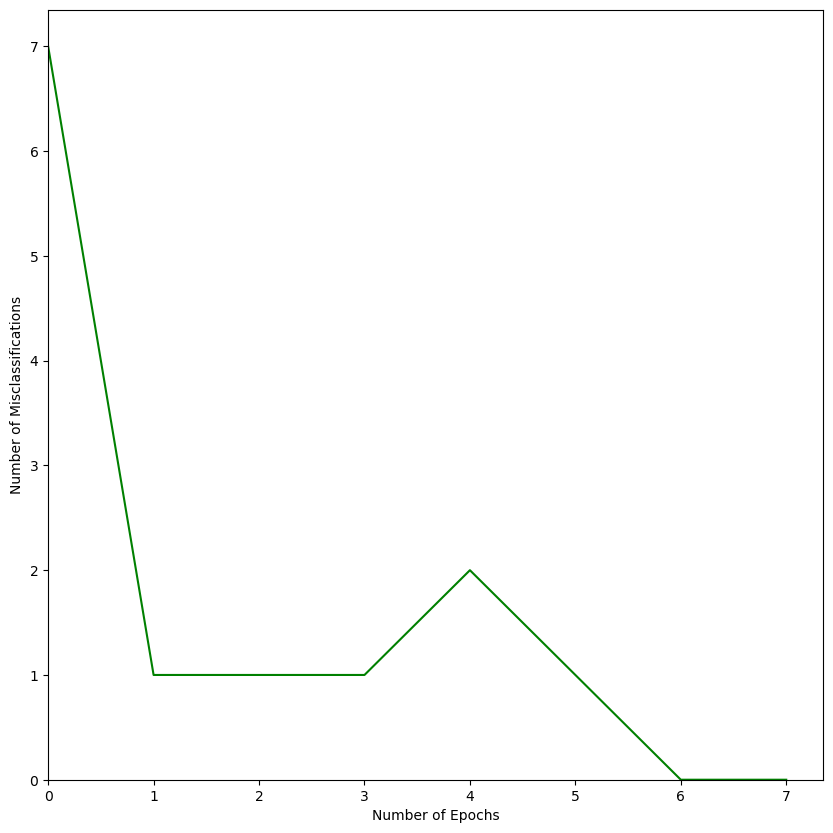

7 itr for taking AVG
Number of Misclassifications:  11


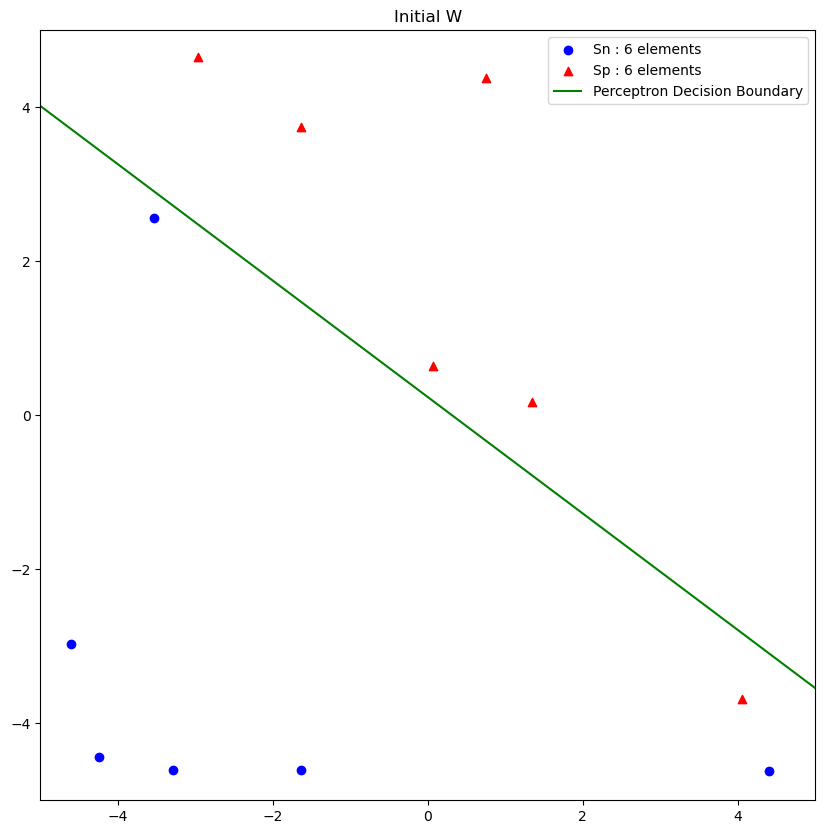

Updated weights:  [-0.8599677762716176, 3.080334009947139, -3.151313186339636]
Updated weights:  [-1.8599677762716176, -1.3228509062342795, 1.4712471702465608]
Updated weights:  [-0.8599677762716176, 0.017729102220924275, 1.6466754136411375]
Updated weights:  [0.14003222372838242, 4.0771799436292895, -2.0354833074483216]
Number of Misclassifications:  6
missed arry :  [11, 6]
Updated weights:  [-0.8599677762716176, -0.3260049725521288, 2.5870770491378754]
Updated weights:  [0.14003222372838242, 1.014575035903075, 2.762505292532452]
Updated weights:  [1.1400322237283824, 5.07402587731144, -0.919653428557007]
Number of Misclassifications:  3
missed arry :  [11, 6, 3]
Updated weights:  [0.14003222372838242, 0.6708409611300219, 3.70290692802919]
Updated weights:  [1.1400322237283824, 4.730291802538387, 0.020748206939730895]
Number of Misclassifications:  3
missed arry :  [11, 6, 3, 3]
Updated weights:  [0.14003222372838242, 0.32710688635696883, 4.6433085635259275]
Updated weights:  [1.1400

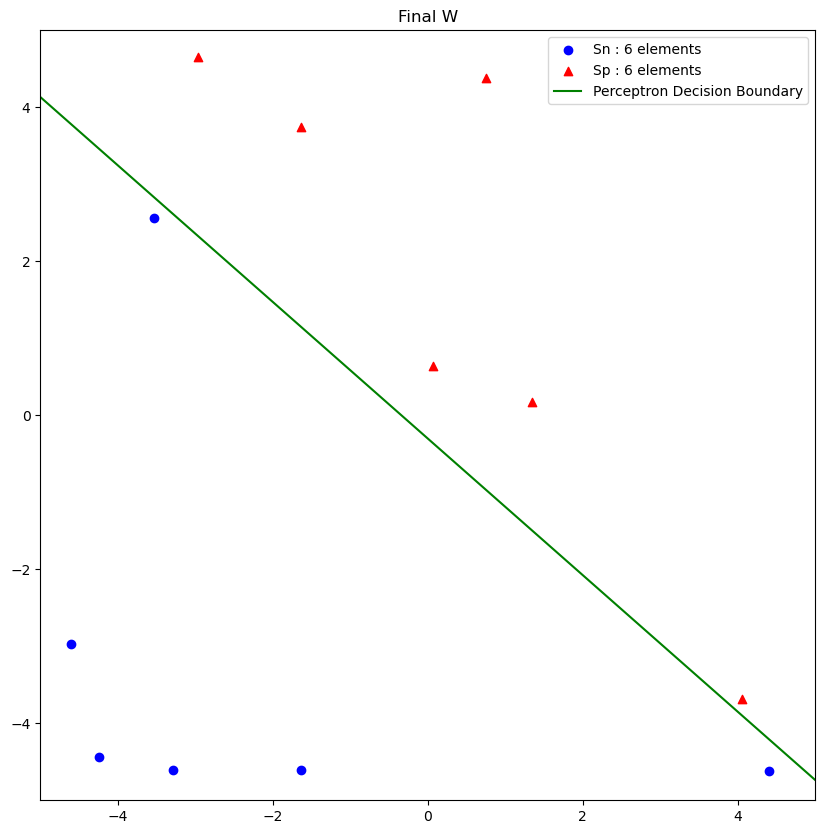

Number of Misclassifications:  18


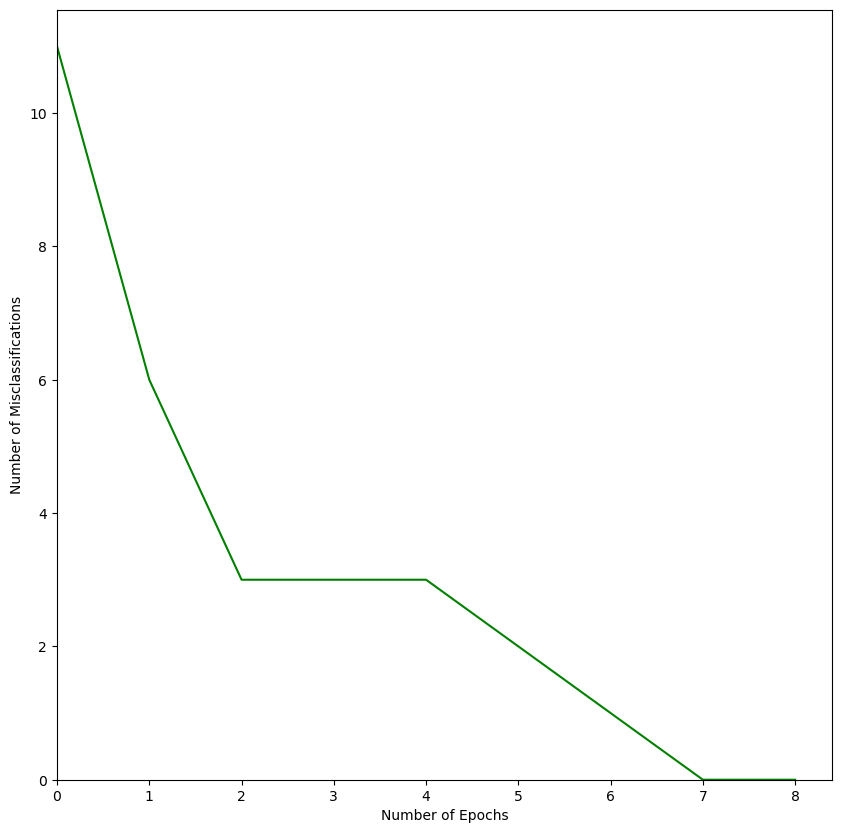

8 itr for taking AVG
Number of Misclassifications:  2


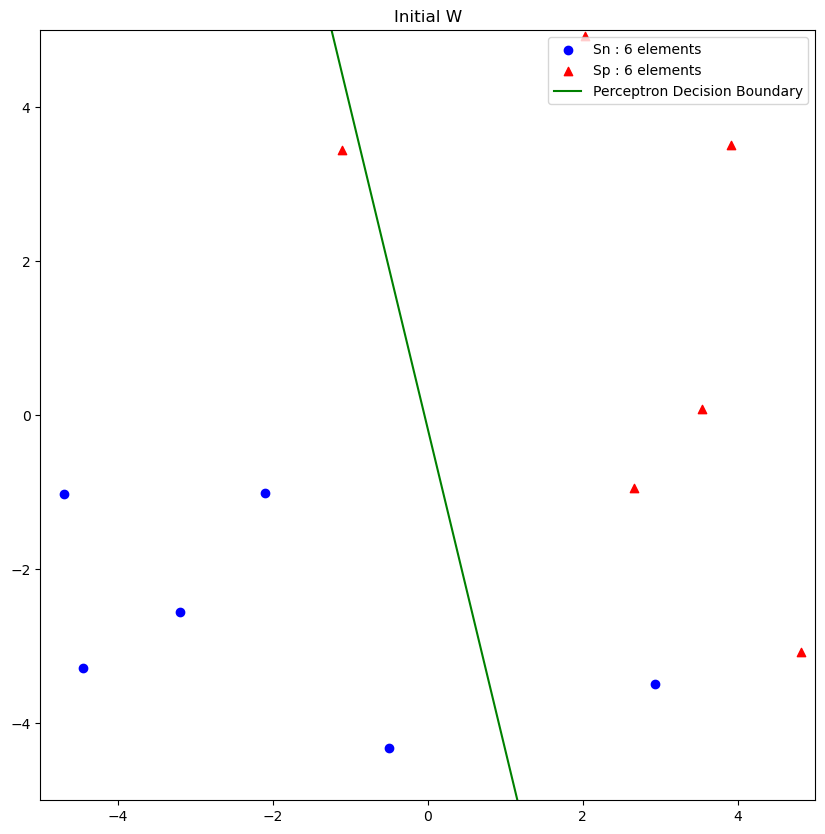

Updated weights:  [-0.9706224458271693, -2.228398728427937, 3.655600987796739]
Updated weights:  [-1.9706224458271693, -0.13162876732811224, 4.663066172170851]
Updated weights:  [-0.9706224458271693, 2.536044241863494, 3.713231096188638]
Updated weights:  [0.029377554172830722, 7.357539309677272, 0.6390604026619071]
Updated weights:  [1.0293775541728307, 6.2546201076620385, 4.0881654954655255]
Number of Misclassifications:  1
missed arry :  [2, 1]
Updated weights:  [0.029377554172830722, 3.321458625857602, 7.574768591873568]
Updated weights:  [1.0293775541728307, 8.14295369367138, 4.500597898346837]
Number of Misclassifications:  1
missed arry :  [2, 1, 1]
Updated weights:  [0.029377554172830722, 5.209792211866944, 7.987200994754879]
Number of Misclassifications:  0
missed arry :  [2, 1, 1, 0]
Final weights:  [0.029377554172830722, 5.209792211866944, 7.987200994754879]
Final res 
 W_vects:  [[0.029377554172830778, 0.7047627533764997, 0.1689978913886967], [1.0293775541728307, 6.25462010

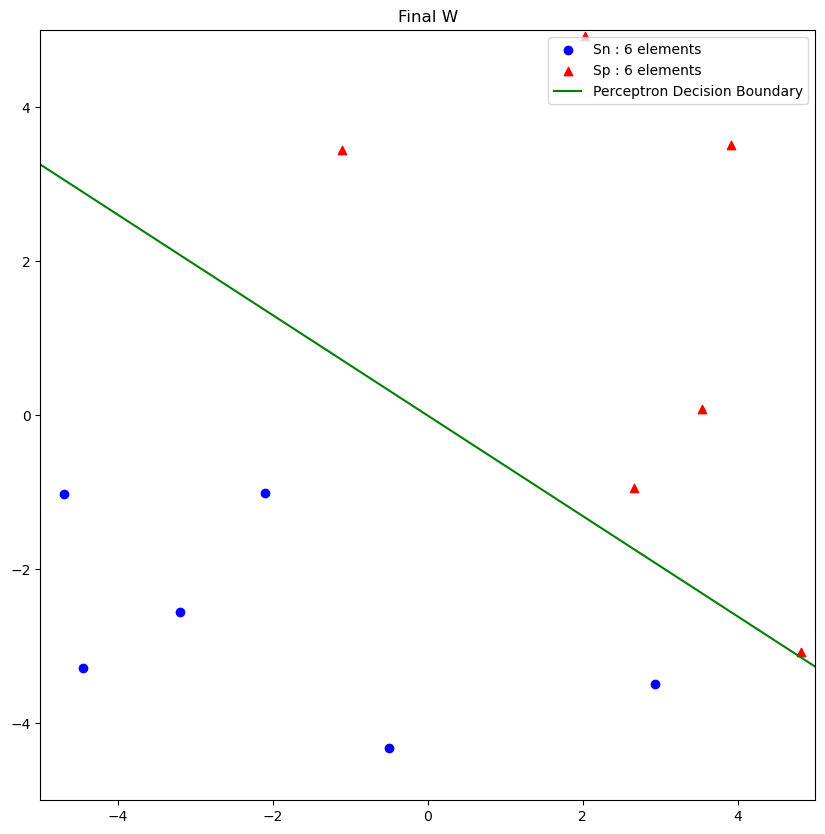

Number of Misclassifications:  4


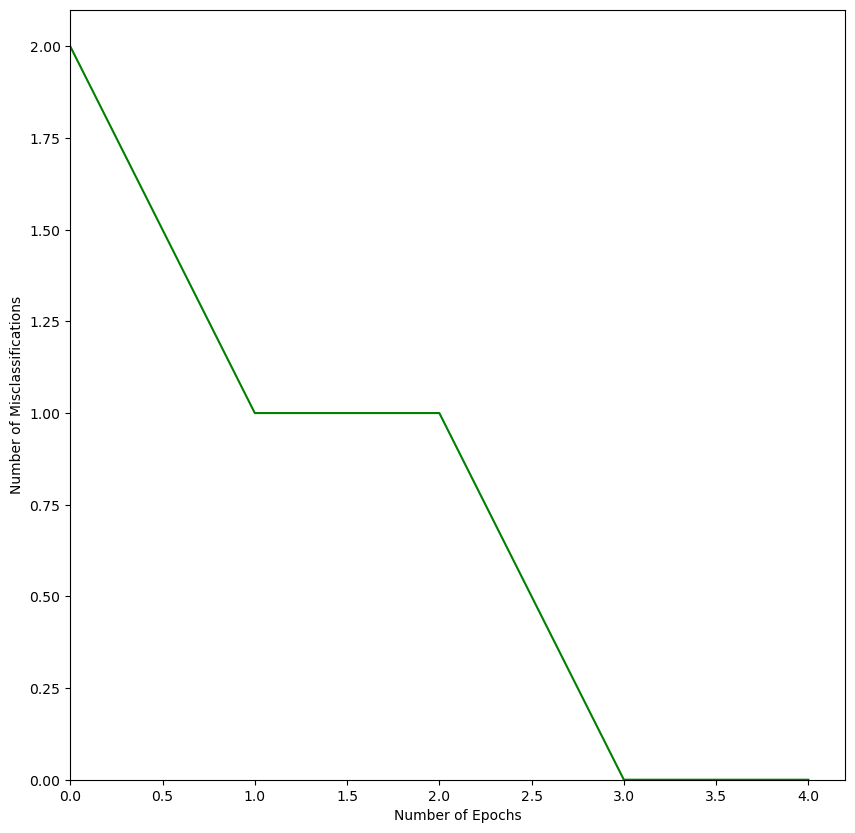

9 itr for taking AVG
Number of Misclassifications:  4


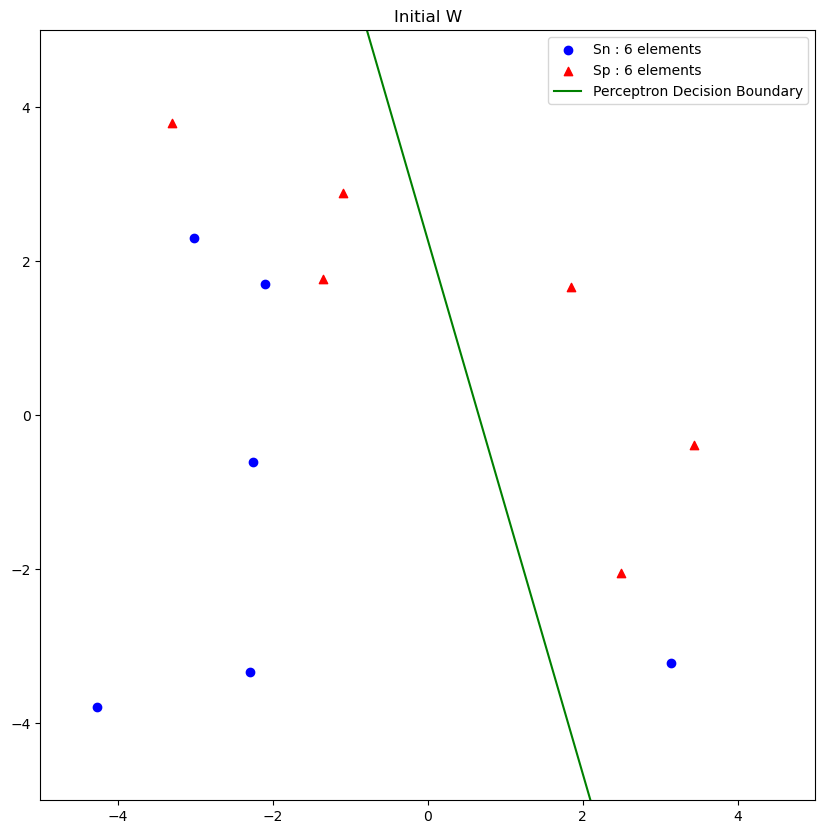

Updated weights:  [-1.1847990809570843, -2.8598115437410607, 3.2999392650044674]
Updated weights:  [-2.1847990809570845, -0.7538227506214197, 1.5963684878740443]
Updated weights:  [-3.1847990809570845, 2.257628332915117, -0.7086080780818333]
Updated weights:  [-2.1847990809570845, 4.110551094865728, 0.9602733385883253]
Updated weights:  [-1.1847990809570845, 2.755971279792665, 2.7317250602430994]
Number of Misclassifications:  1
missed arry :  [4, 1]
Updated weights:  [-0.18479908095708453, 1.4013914647196026, 4.503176781897873]
Number of Misclassifications:  3
missed arry :  [4, 1, 3]
Updated weights:  [-1.1847990809570845, 3.5073802578392437, 2.7996060047674503]
Updated weights:  [-0.18479908095708453, 2.152800442766181, 4.571057726422224]
Number of Misclassifications:  3
missed arry :  [4, 1, 3, 3]
Updated weights:  [-1.1847990809570845, 4.258789235885822, 2.867486949291801]
Updated weights:  [-0.18479908095708453, 2.9042094208127596, 4.638938670946575]
Number of Misclassifications:

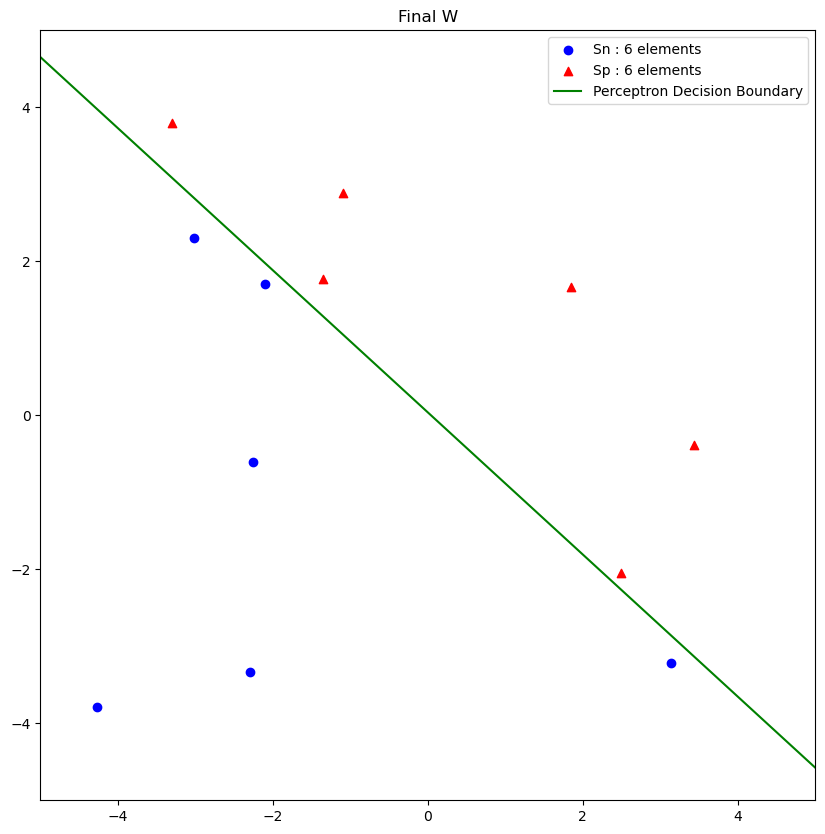

Number of Misclassifications:  2


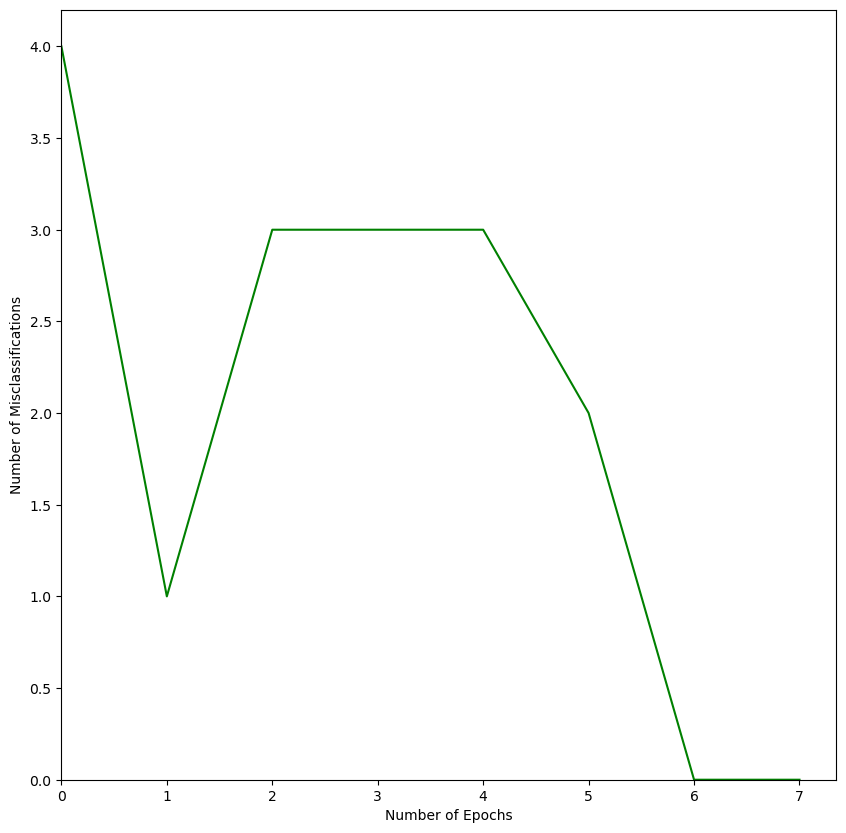

AVG accuracy with 60% of training samples : 53.0
AVG accuracy with 100% of training samples : 43.0


In [42]:

def run_(sample_num):
    # Initializing the ground truth boundary of a dataset and creating a training and testing dataset for a perceptron classifier.

    # Initilize the true boundary, aka, ground truth
    w0 = 0
    w1 = 1
    w2 = 1
    true_w_vector = [w0, w1, w2]

    # Initilize the dataset
    Sn = [] # List to store negative samples
    Sp = [] # List to store positive samples
    num_n = 0 # Counter for negative samples
    num_p = 0 # Counter for positive samples

    target_num_samples=20
    while num_p < target_num_samples or num_n < target_num_samples:
      i1 = np.random.uniform(-5, 5)
      i2 = np.random.uniform(-5, 5)
      if (1*w0)+(i1*w1)+(i2*w2) >= 0:
        if num_p < target_num_samples:
          Sp.append([i1] + [i2] + [1])
          num_p +=1
      elif num_n < target_num_samples:
        Sn.append([i1] + [i2] + [-1])
        num_n +=1

    #plotting_classification_result10(Sp, Sn, true_w_vector, 'Ground Truth')

    # Split the dataset in to training (Sp, Sn) and testing (Tp, Tn)
    # The last 10 samples from Sn and Sp are used for testing.
    Tp = Sp[10:]
    Tn = Sn[10:]

    # The first 10 or 6 samples from Sn and Sp are used for training.
    Sp = Sp[:sample_num]  # To-Do
    Sn = Sn[:sample_num]  # To-Do

    # Combine positive and negative samples to create the dataset
    dataset = Sn + Sp

    # Initilize the weight
    w0 = np.random.uniform(-1/4, 1/4)
    w1 = np.random.uniform(-1, 1)
    w2 = np.random.uniform(-1, 1)
    w_vector = [w0, w1, w2]

    #plotting_classification_result10(Sp, Sn, w_vector, 'Initial W')

    a = misclassified(dataset, w_vector) # Get the number of misclassifications
    print ('Number of Misclassifications: ', a)

    #print ('Initial weights: ' , w_vector)
    w_history=[] # List to store weight history during training
    w_history, missed = perceptron_training(dataset, w_vector) # Call perceptron_training function to get weight history and number of misclassifications

    #plotting_classification_result10(Sp, Sn, w_history[-1], 'Final W')
    plotting_classification_result10(dataset, w_history[-1], 'Final W')

    # Perform classification on test data
    #plotting_classification_result10(Tp, Tn, w_history[-1], 'Final W on test data')
    a = misclassified(Tp + Tn, w_vector) # Get the number of misclassifications
    print ('Number of Misclassifications: ', a)

    plotting_misclassification_over_epochs(w_history, missed)

    return a # returning cnt of misclassified




miss_cnt_100=0
miss_cnt_60=0
for i in range(10):
    print(f"{i} itr for taking AVG")
    miss_cnt_100 += run_(10)

avg_100 = ( (200 - miss_cnt_100) / 200 ) * 100

for i in range(10):
    print(f"{i} itr for taking AVG")
    miss_cnt_60 += run_(6)

avg_60 = ( (200 - miss_cnt_60) / 200 ) * 100

print(f"AVG accuracy with 60% of training samples : {avg_60}")
print(f"AVG accuracy with 100% of training samples : {avg_100}")



